In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("query_3ec5aea3_20240410T153703.csv")

C:\Users\Melissa\AppData\Local\Temp\ipykernel_54412\2778482472.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("query_3ec5aea3_20240410T153703.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600773 entries, 0 to 600772
Data columns (total 39 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   fecha                                 600773 non-null  float64
 1   sociedad                              600773 non-null  float64
 2   cuif                                  595724 non-null  float64
 3   subcuenta                             595724 non-null  float64
 4   centro_vice                           600734 non-null  object 
 5   centro                                548264 non-null  object 
 6   orden                                 47389 non-null   object 
 7   pospre                                595542 non-null  object 
 8   moneda                                600773 non-null  object 
 9   cege_mayor                            598864 non-null  object 
 10  programa_financia_final               600773 non-null  object 
 11  

In [5]:
df.fecha.unique() #Fechas disponibles para el analisis

array([202401., 202403., 202402., 202413.])

In [6]:
df.sociedad.unique() #Compañías a analizar

array([1000., 5000., 3000., 4000., 4700.])

In [7]:
df.gasto_ejecutado.head()

0    0.001516
1    0.000658
2    0.000625
3    0.000329
4    0.001041
Name: gasto_ejecutado, dtype: float64

In [10]:
df['gasto_ejecutado'] = df['gasto_ejecutado']*65987456 #Multiplicar por un numero aleatorio para darle sentido de pesos colombianos

In [11]:
cantidad_sociedad = df.sociedad.value_counts()

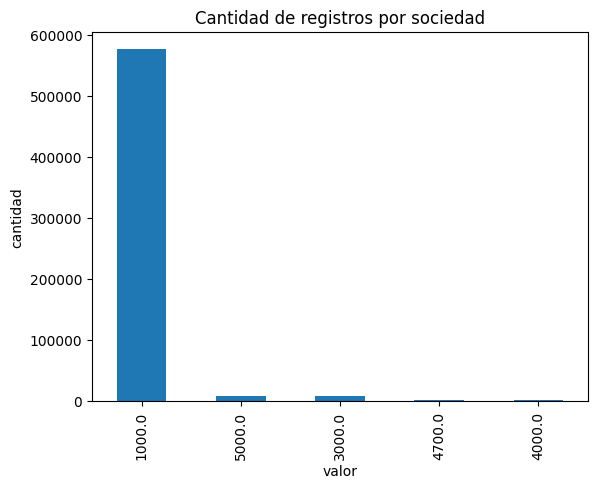

In [12]:
cantidad_sociedad.plot(kind='bar')
plt.xlabel("valor")
plt.ylabel("cantidad")
plt.title("Cantidad de registros por sociedad")
plt.show()
#Cantidad de registros por sociedad

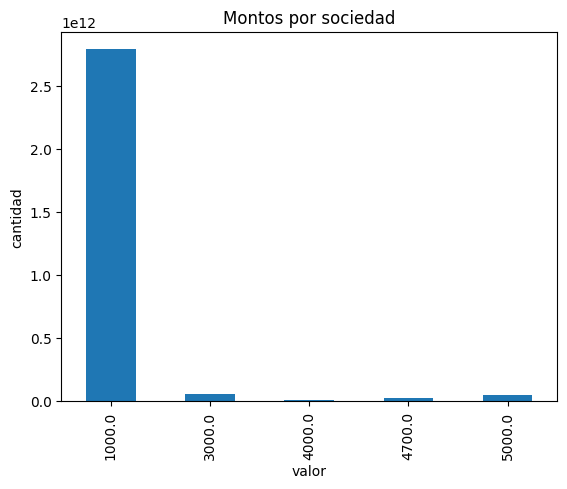

In [13]:
monto_por_sociedad = df.groupby("sociedad")["gasto_ejecutado"].sum()
monto_por_sociedad.plot(kind='bar')
plt.xlabel("valor")
plt.ylabel("cantidad")
plt.title("Montos por sociedad")
plt.show()

Se toma la decisión en enfocar el analisis en la sociedad 1000, dado que es la sociedad que contiene mayor cantidad de registros y el monto es mayor en toda la base proporcionada

In [14]:
len(df.cuif.unique()) #cuentas contables

622

In [15]:
len(df.subcuenta.unique()) #subcuentas contables

111

In [16]:
df.nivel_1_cuenta.unique() #Tipos de descripcion de cuentas

array([' Utiles Y Papeleria', ' Transporte', nan,
       ' Aportes A La Seguridad Social', ' Impuestos Y Contribuciones',
       ' Adecuación E Instalación', ' Mantenimiento Y Reparaciones',
       ' Arrendamientos', 'Diversos Otros',
       ' Servicios De Aseo Y Vigilancia', ' Otros', ' Multas Y Sanciones',
       ' Salarios', ' Vacaciones Legales Y Extralegales',
       ' Prima Legal Y Extralegal', ' Bonificaciones',
       ' Pensiones De Jubilación', ' Prima De Antiguedad',
       ' Riesgo Operativo', 'Licencias De Software', ' Gastos Legales',
       ' Seguros', 'Gastos Legales', 'Riesgo Operativo',
       ' Depreciación Y Amortización', 'Negocios Fiduciarios',
       ' Publicidad', ' Cesantias E Intereses A Las Cesantías',
       ' Asesoría Jurídica', 'Honorarios Otros',
       'Honorarios Riesgo Operativo', ' Servicios Publicos',
       ' Contribuciones Y Afiliaciones', ' Garantías',
       'Honorarios Avaluos', ' Honorarios Junta Directiva',
       'Depreciación Y Amortización',

In [17]:
len(df.proveedor.unique()) #Cantidad de proveedores unicos

31615

Text(0.5, 1.0, 'Top 10 de proveedores con mayor representación del gasto')

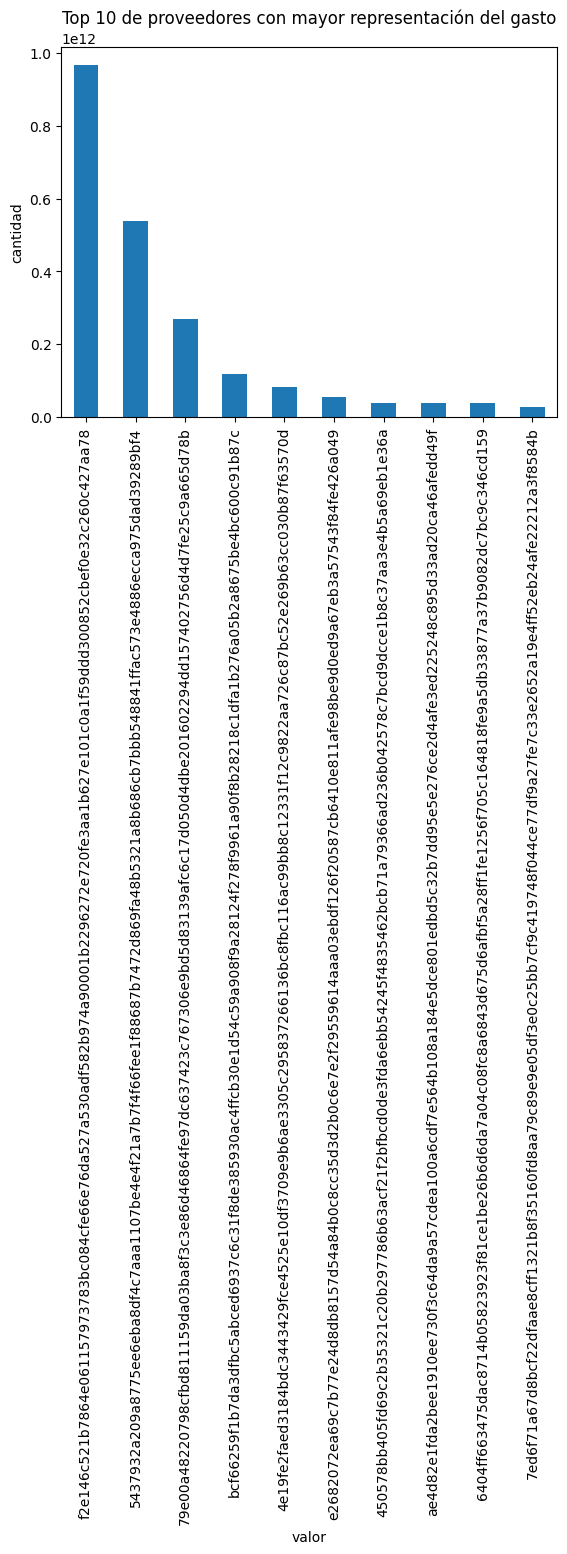

In [18]:
montos_proveedor= df.groupby("proveedor")["gasto_ejecutado"].sum().sort_values(ascending=False)
montos_proveedor[0:10].plot(kind='bar', )
plt.xlabel("valor")
plt.ylabel("cantidad")
plt.title("Top 10 de proveedores con mayor representación del gasto")

In [19]:
print("Registros unicos en variable centro vice: ",len(df.centro_vice.unique()))
print("Muestra centro vice:", df.centro_vice[0:10])
print("Registros unicos en variable centro: ",len(df.centro.unique()))
print("Muestra centro:", df.centro[0:10])

Registros unicos en variable centro vice:  3850
Muestra centro vice: 0    C102100735
1    C100200300
2    C102100735
3    C100200096
4    C102100736
5         C1043
6    C102100734
7        C10848
8    C102100005
9    C100200291
Name: centro_vice, dtype: object
Registros unicos en variable centro:  3606
Muestra centro: 0    C102100735
1    C100200300
2    C102100735
3    C100200096
4    C102100736
5         C1043
6    C102100734
7        C10848
8    C102100005
9    C100200291
Name: centro, dtype: object


In [20]:
#Gasto ejecutado por fecha
df.groupby("fecha")["gasto_ejecutado"].sum().sort_values(ascending=False)

fecha
202402.0    9.931118e+11
202401.0    9.718169e+11
202403.0    9.676550e+11
202413.0    0.000000e+00
Name: gasto_ejecutado, dtype: float64

In [22]:
#Presupuesto por fecha
df.groupby("fecha")["valor_presupuesto"].sum().sort_values(ascending=False)

fecha
202413.0    160694.890951
202402.0     15050.008188
202401.0     14727.297018
202403.0     14664.225732
Name: valor_presupuesto, dtype: float64

In [35]:
# Iterar sobre cada columna y mostrar value_counts()
for column in df.columns:
    print(f"Cantidad de valores para columna: {column}")
    print(df[column].value_counts())
    print()

Cantidad de valores para columna: fecha
fecha
202402.0    220655
202401.0    201704
202403.0    172785
202413.0      5629
Name: count, dtype: int64

Cantidad de valores para columna: sociedad
sociedad
1000.0    576625
5000.0      9469
3000.0      8955
4700.0      3101
4000.0      2623
Name: count, dtype: int64

Cantidad de valores para columna: cuif
cuif
5.140059e+09    83918
5.115211e+09    70641
5.140051e+09    54234
5.190959e+09    33726
5.190451e+09    30240
                ...  
5.115519e+09        1
5.145951e+09        1
5.120431e+09        1
5.190971e+09        1
5.190959e+09        1
Name: count, Length: 621, dtype: int64

Cantidad de valores para columna: subcuenta
subcuenta
514005.0    149070
511521.0     70643
519095.0     55740
512043.0     32409
519045.0     30259
             ...  
512013.0         3
513305.0         3
517577.0         2
517090.0         1
510297.0         1
Name: count, Length: 110, dtype: int64

Cantidad de valores para columna: centro_vice
centro_vice


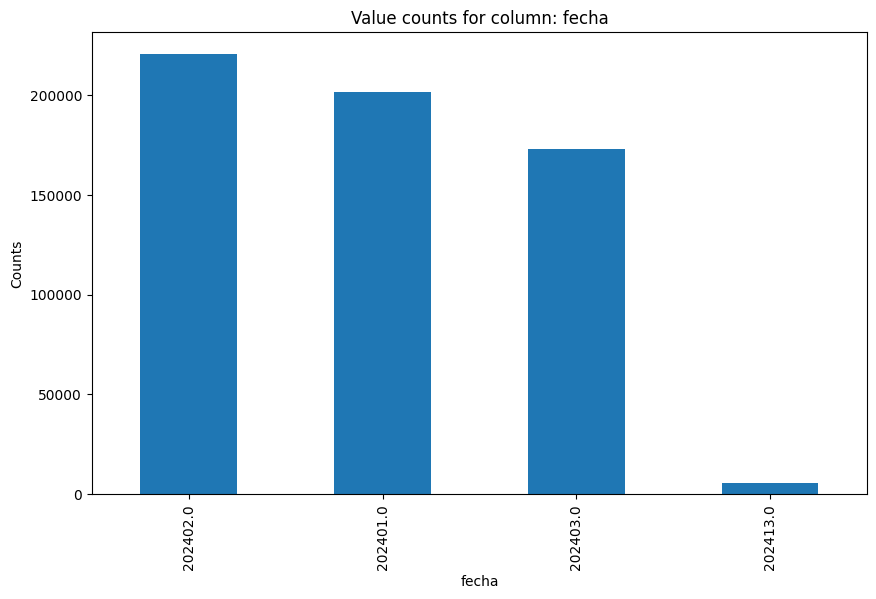

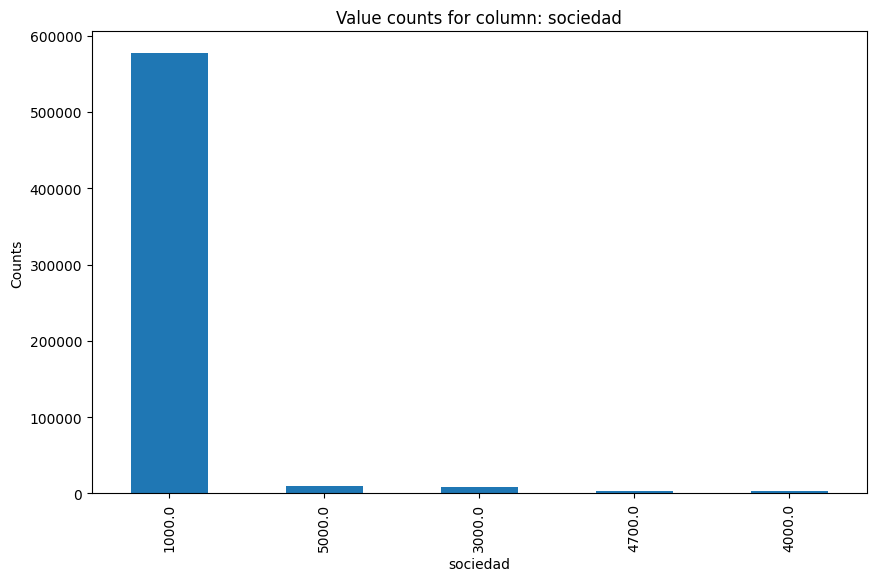

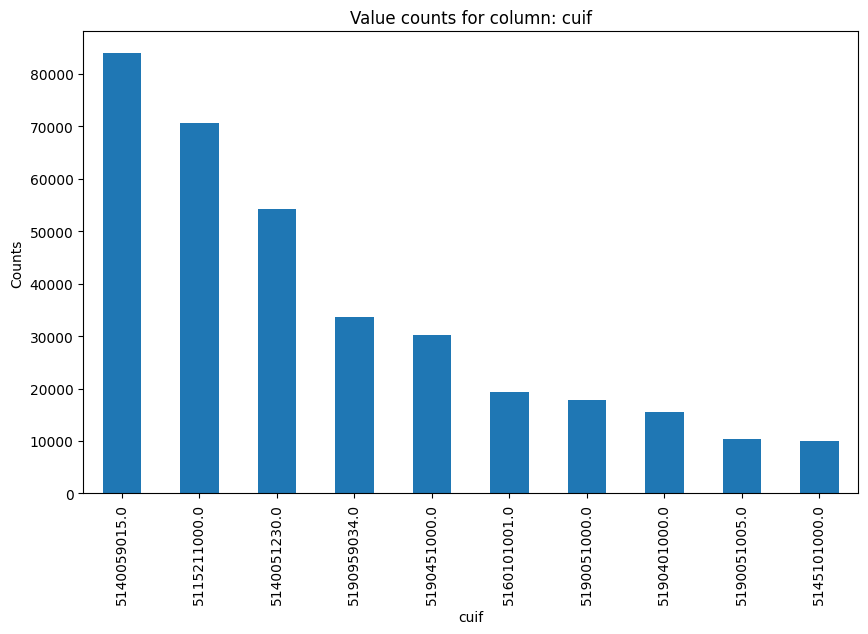

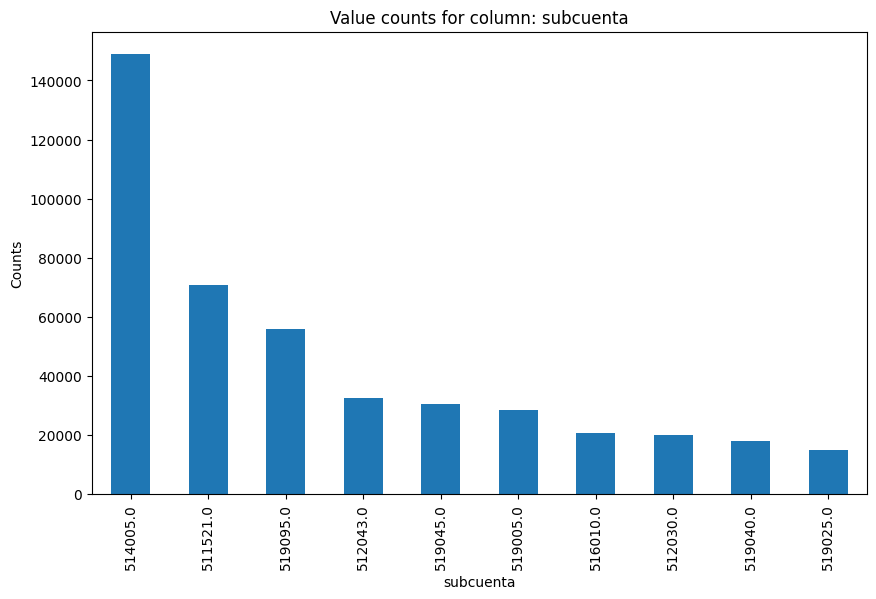

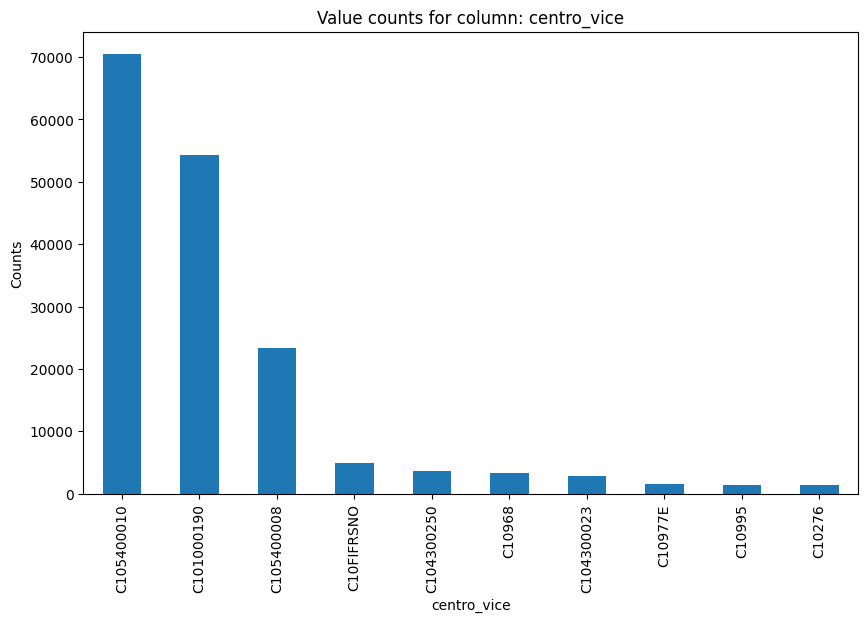

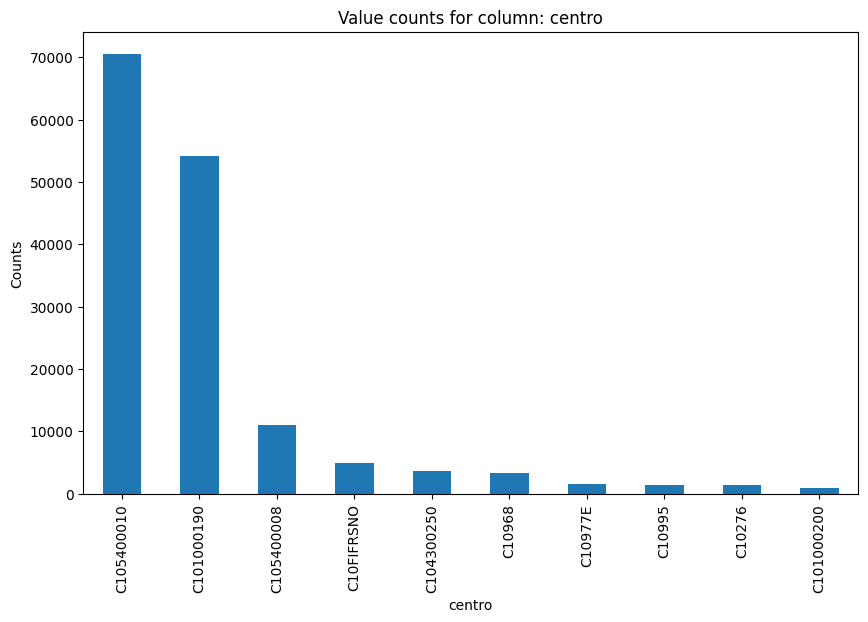

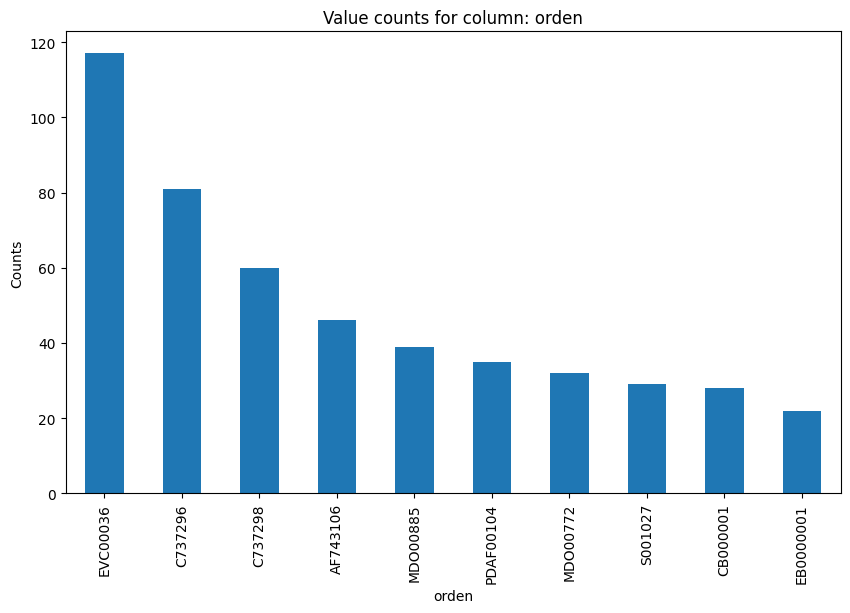

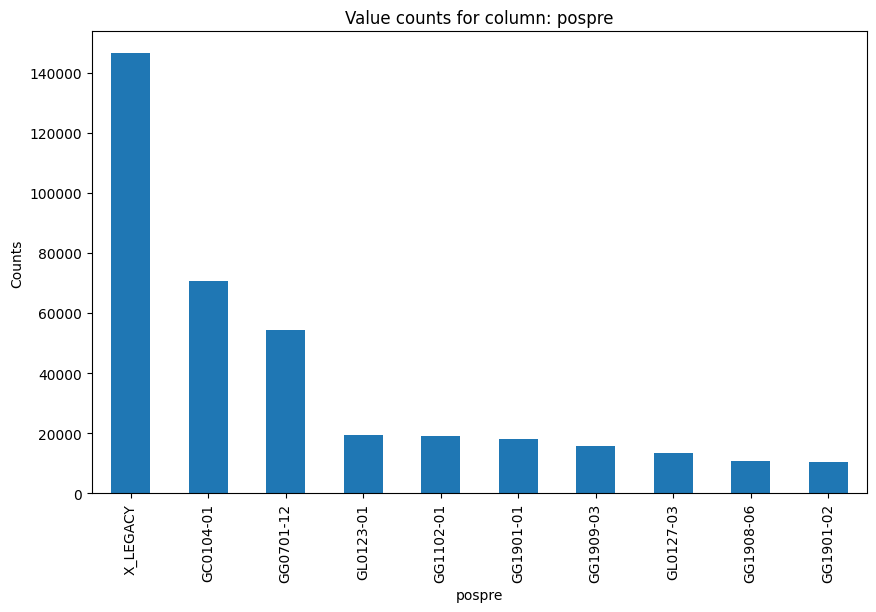

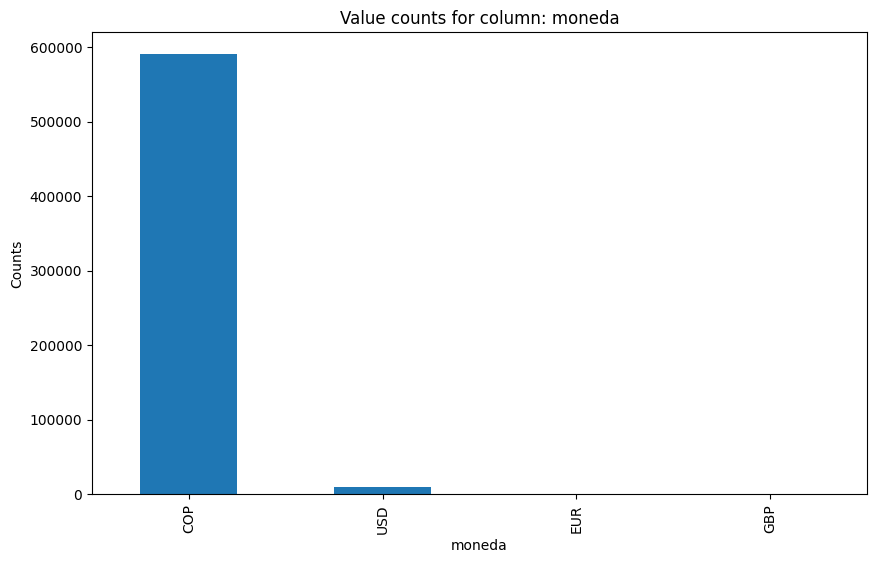

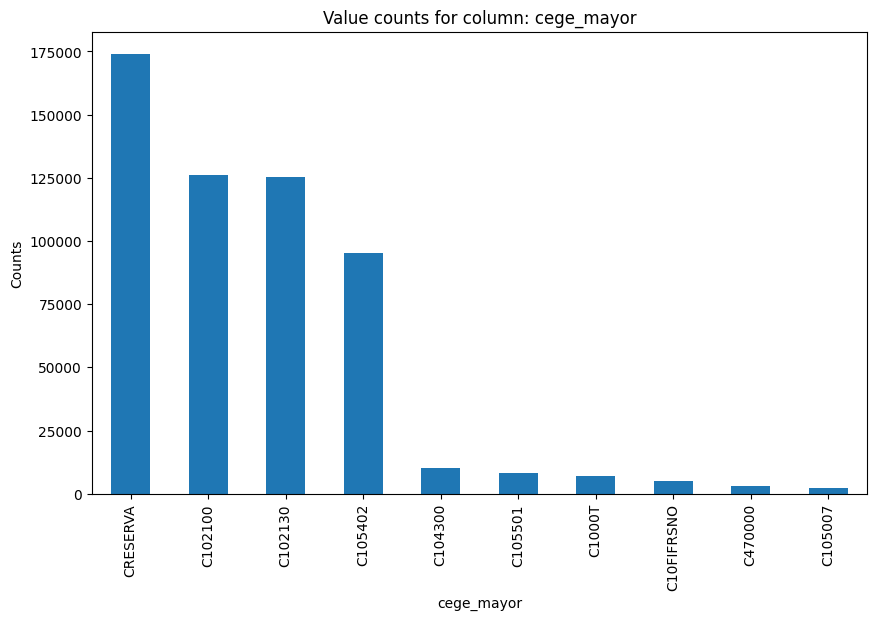

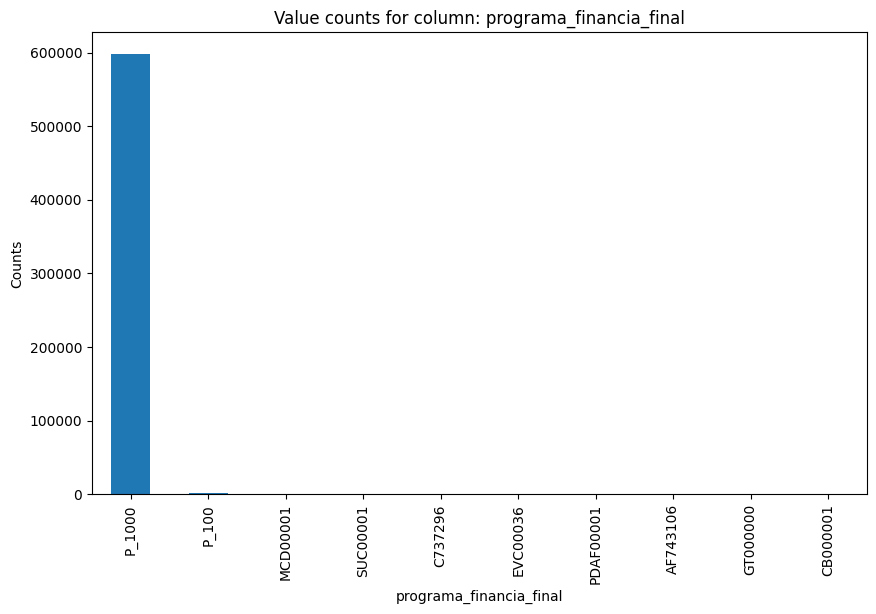

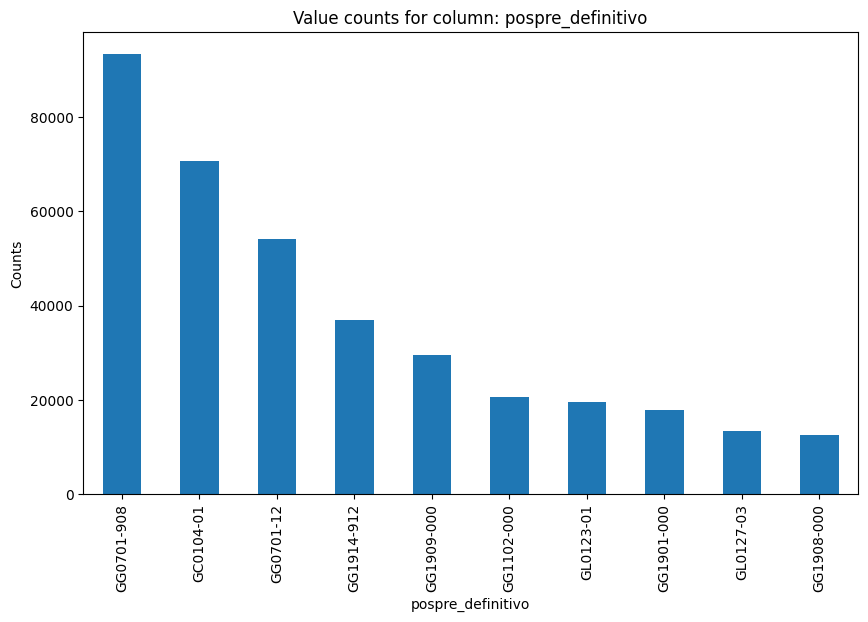

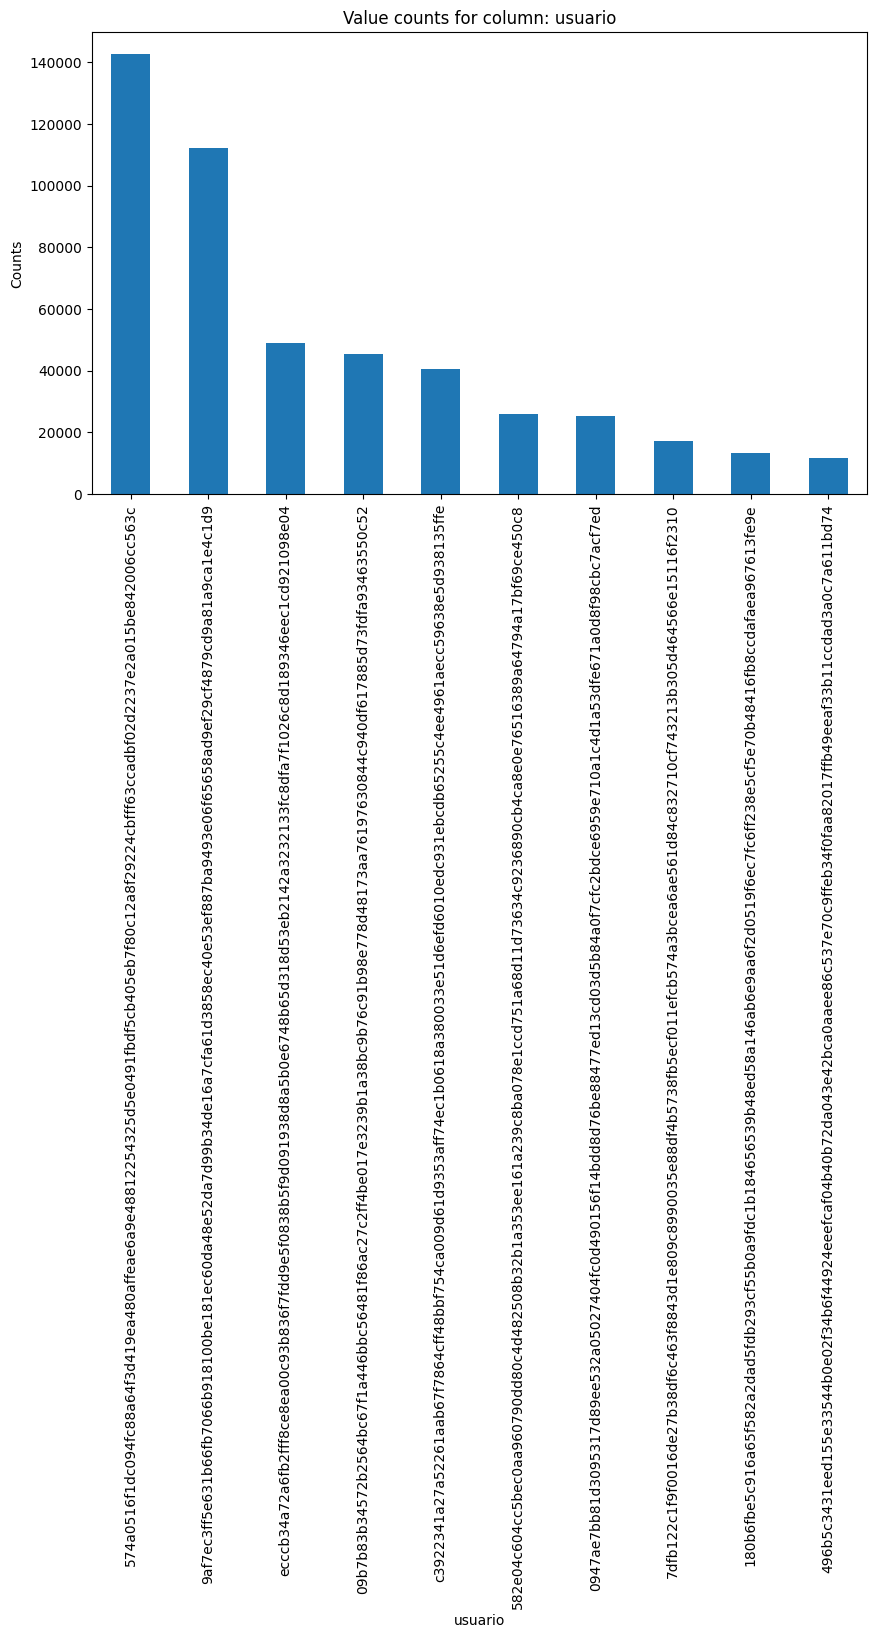

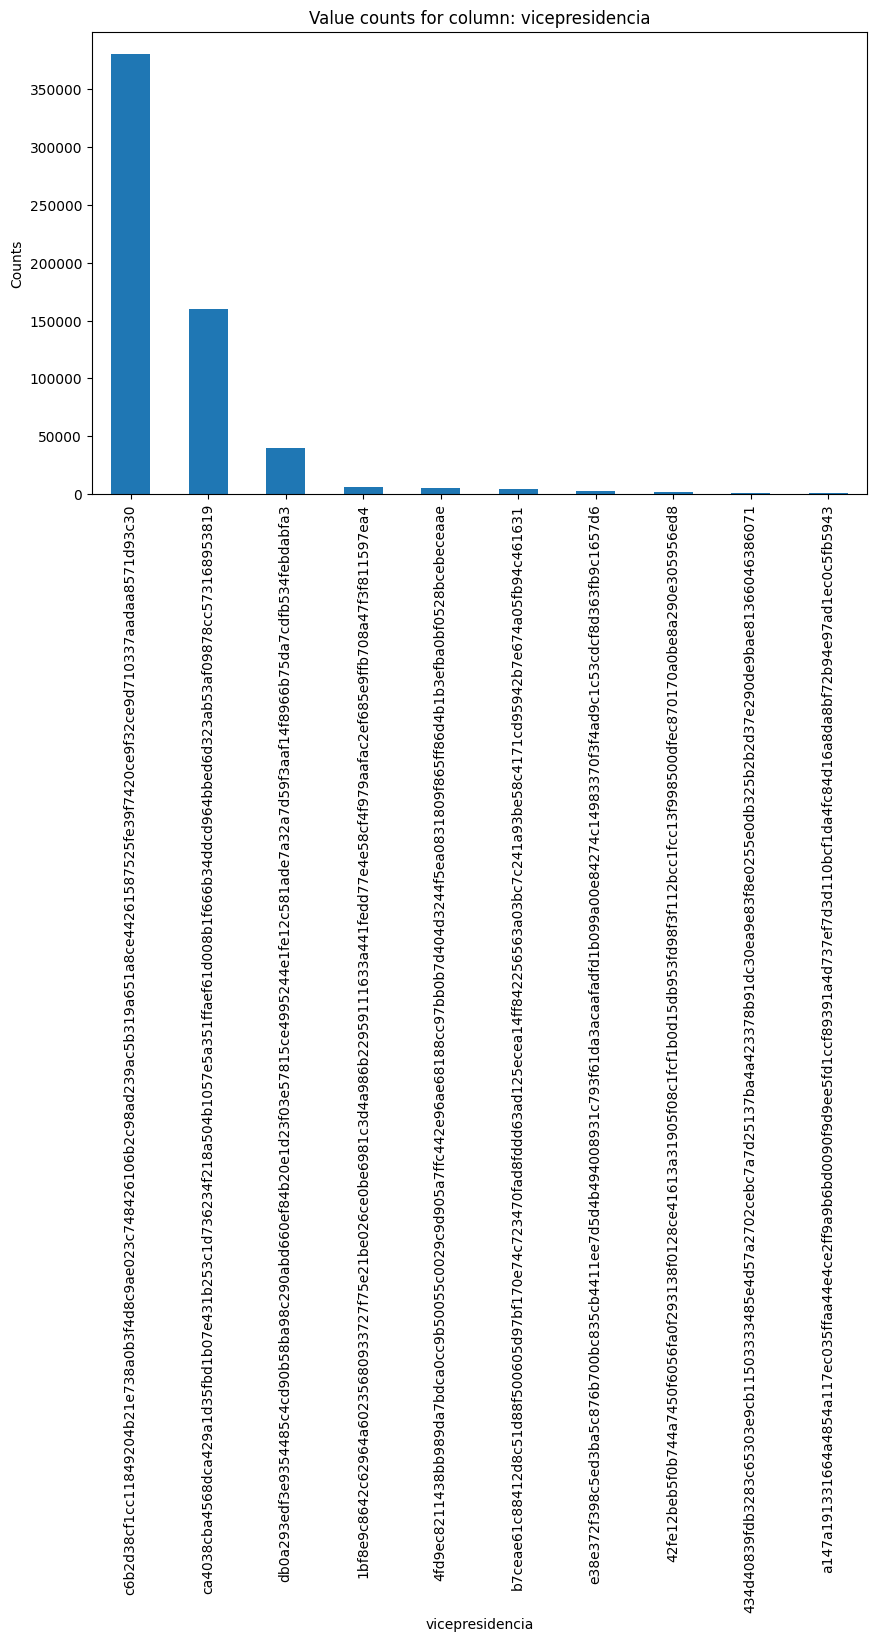

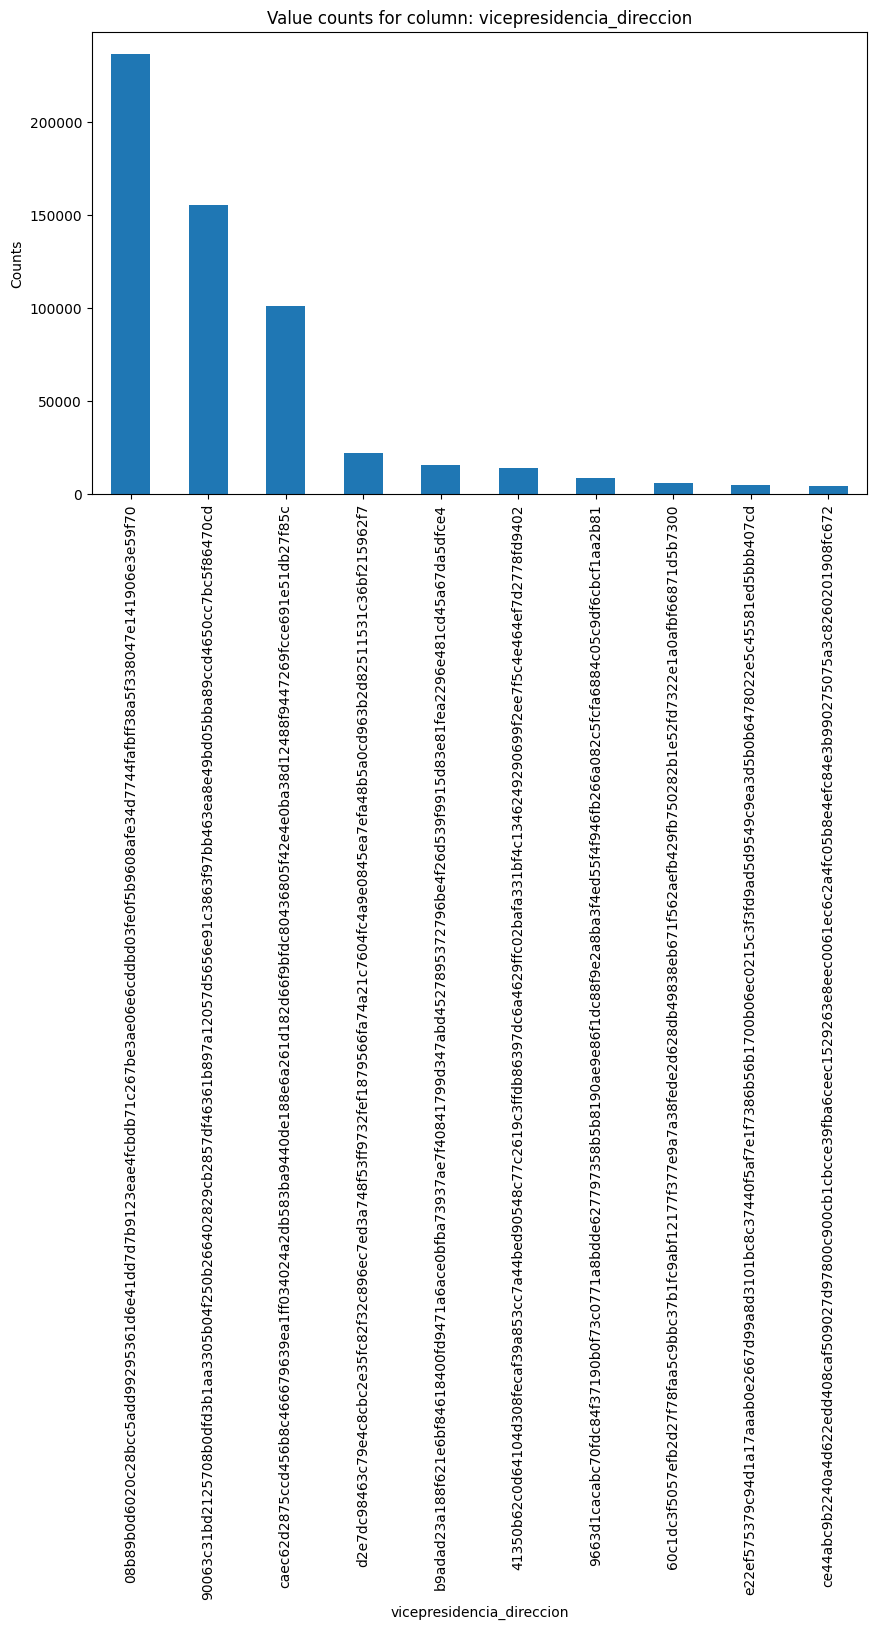

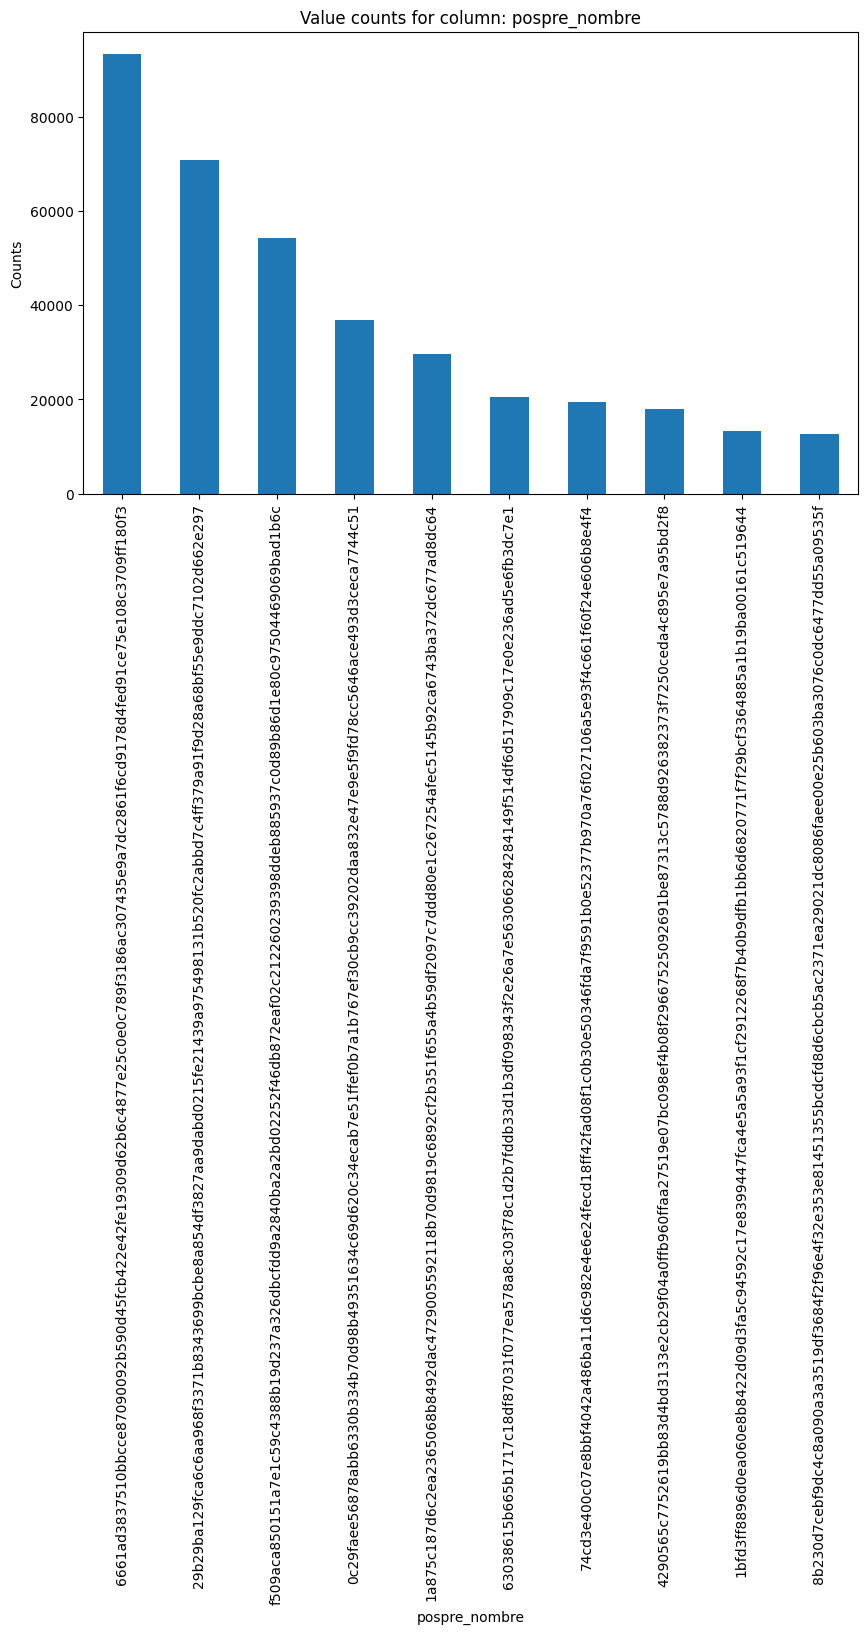

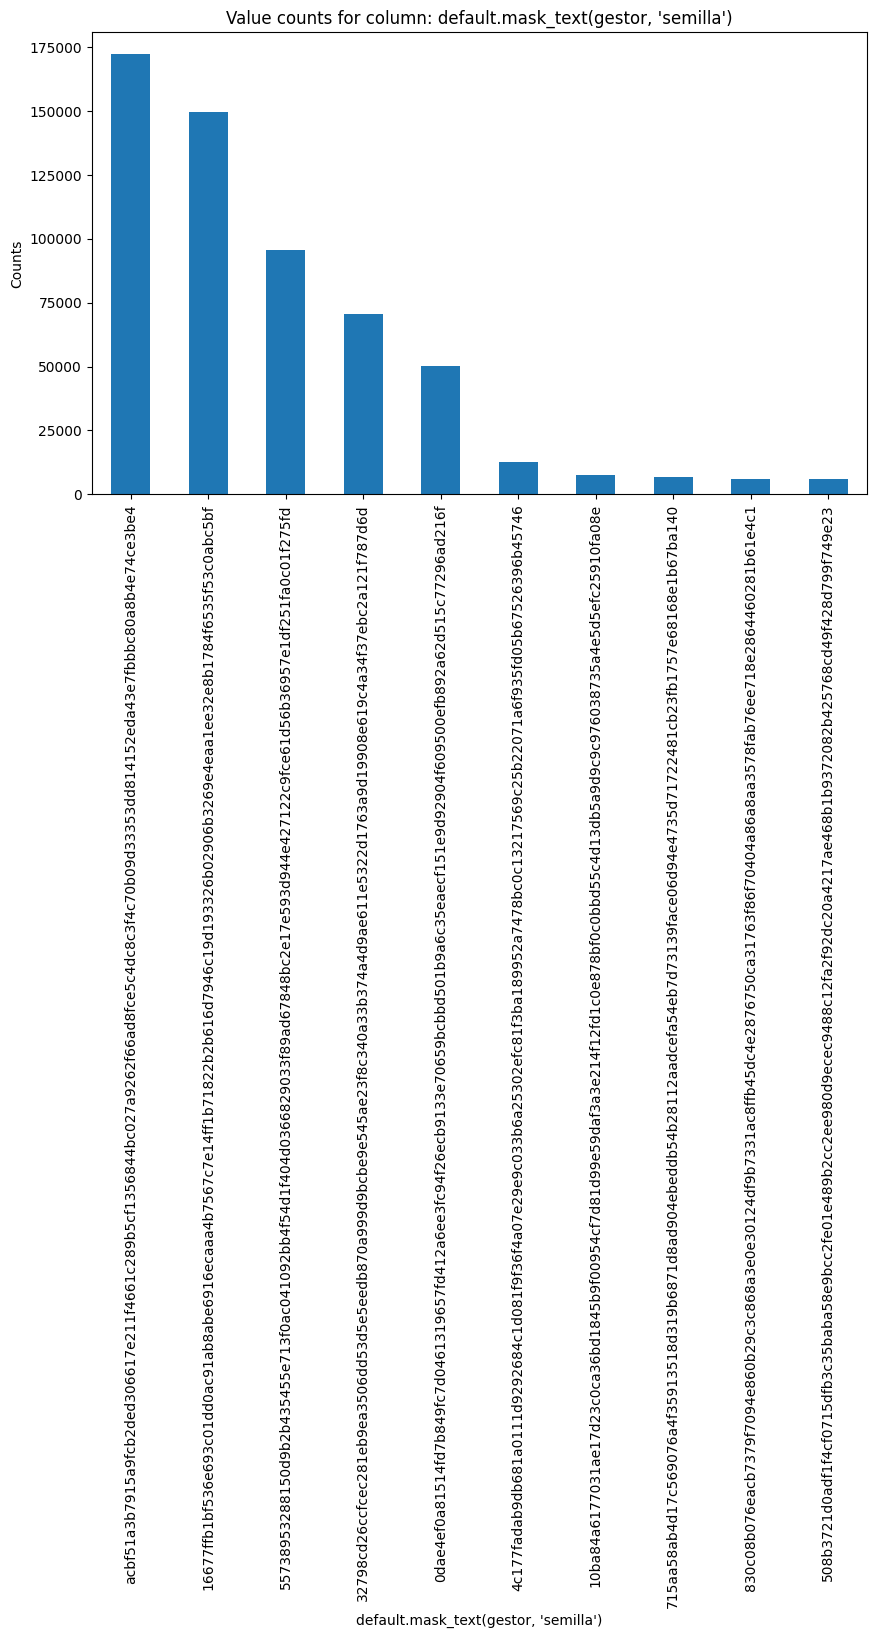

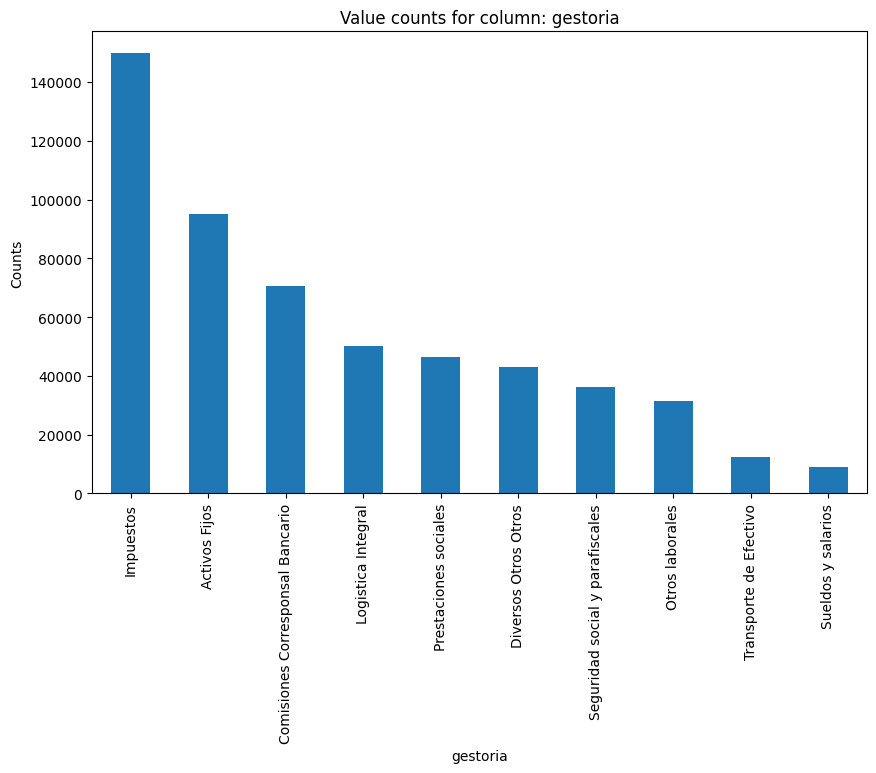

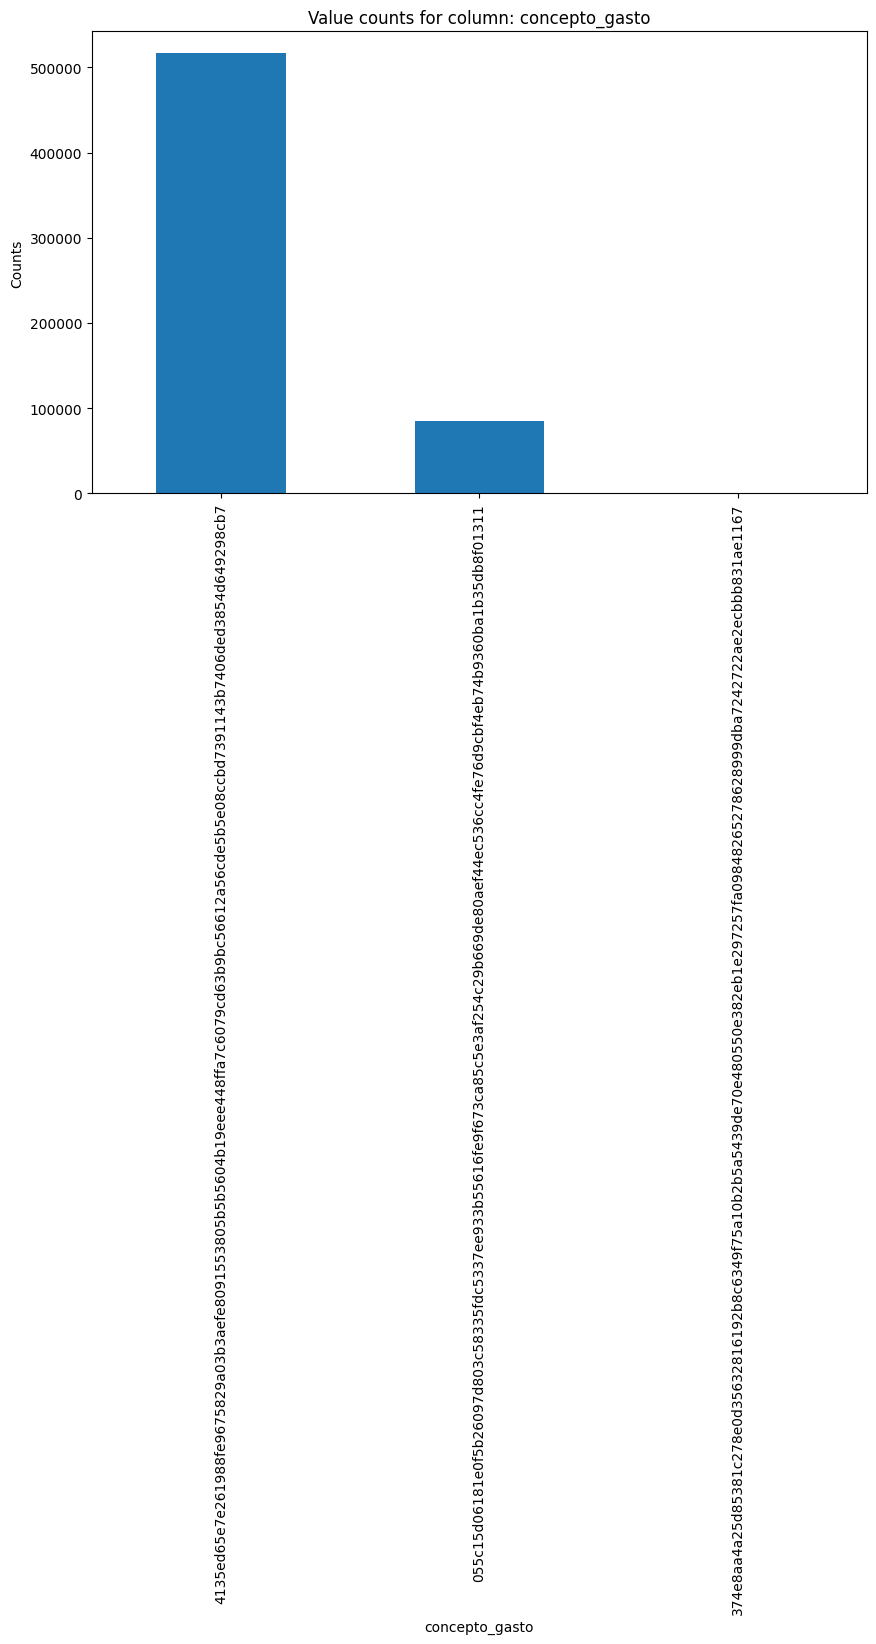

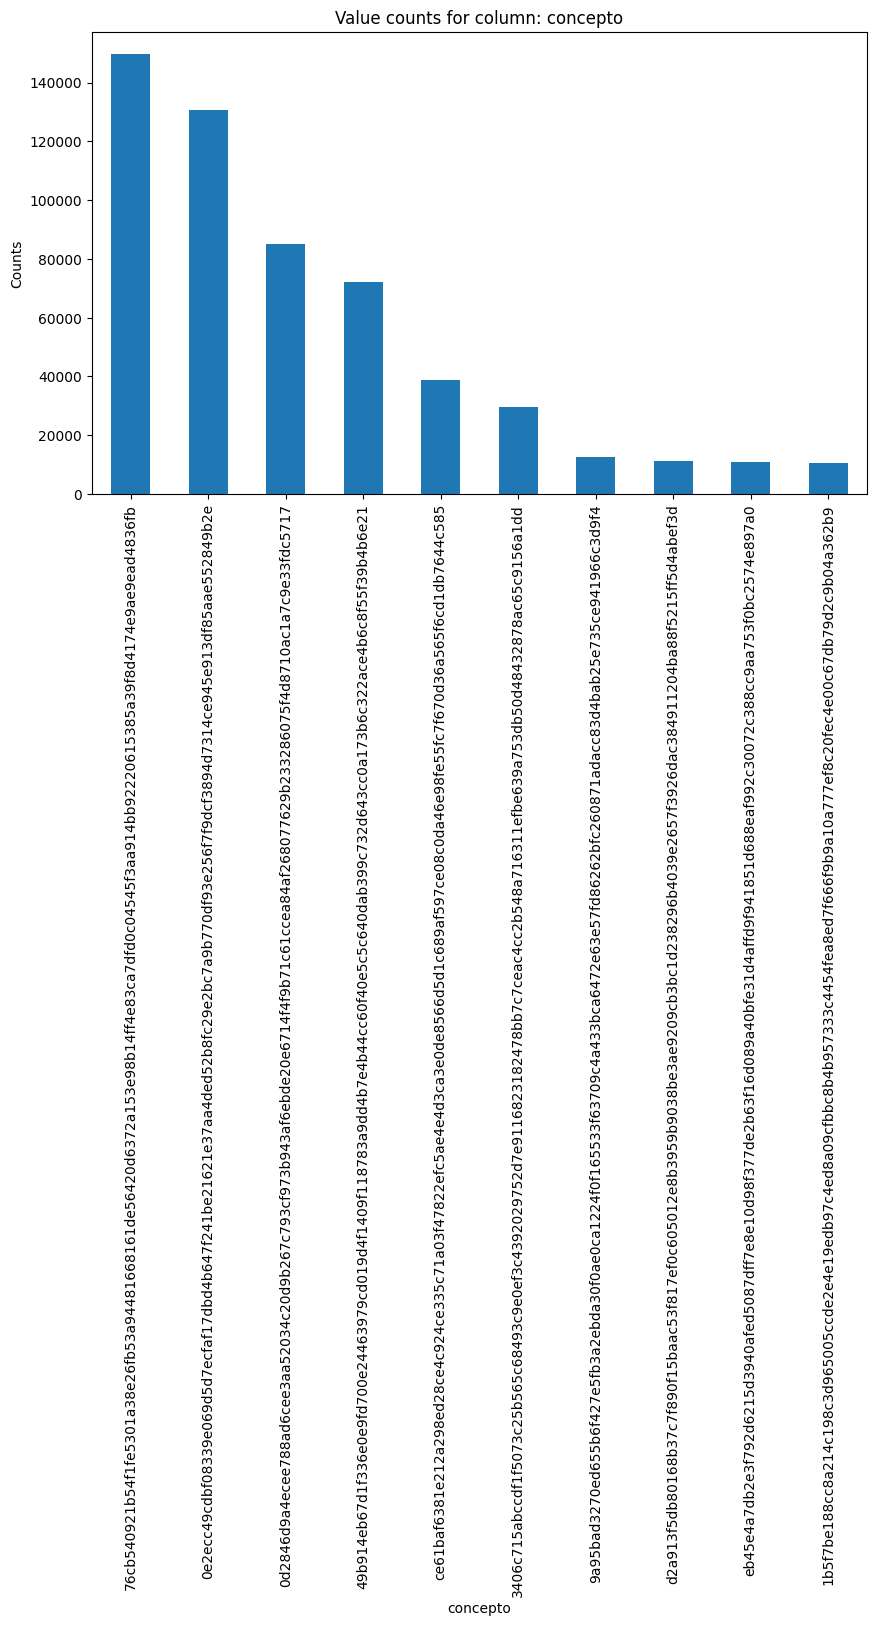

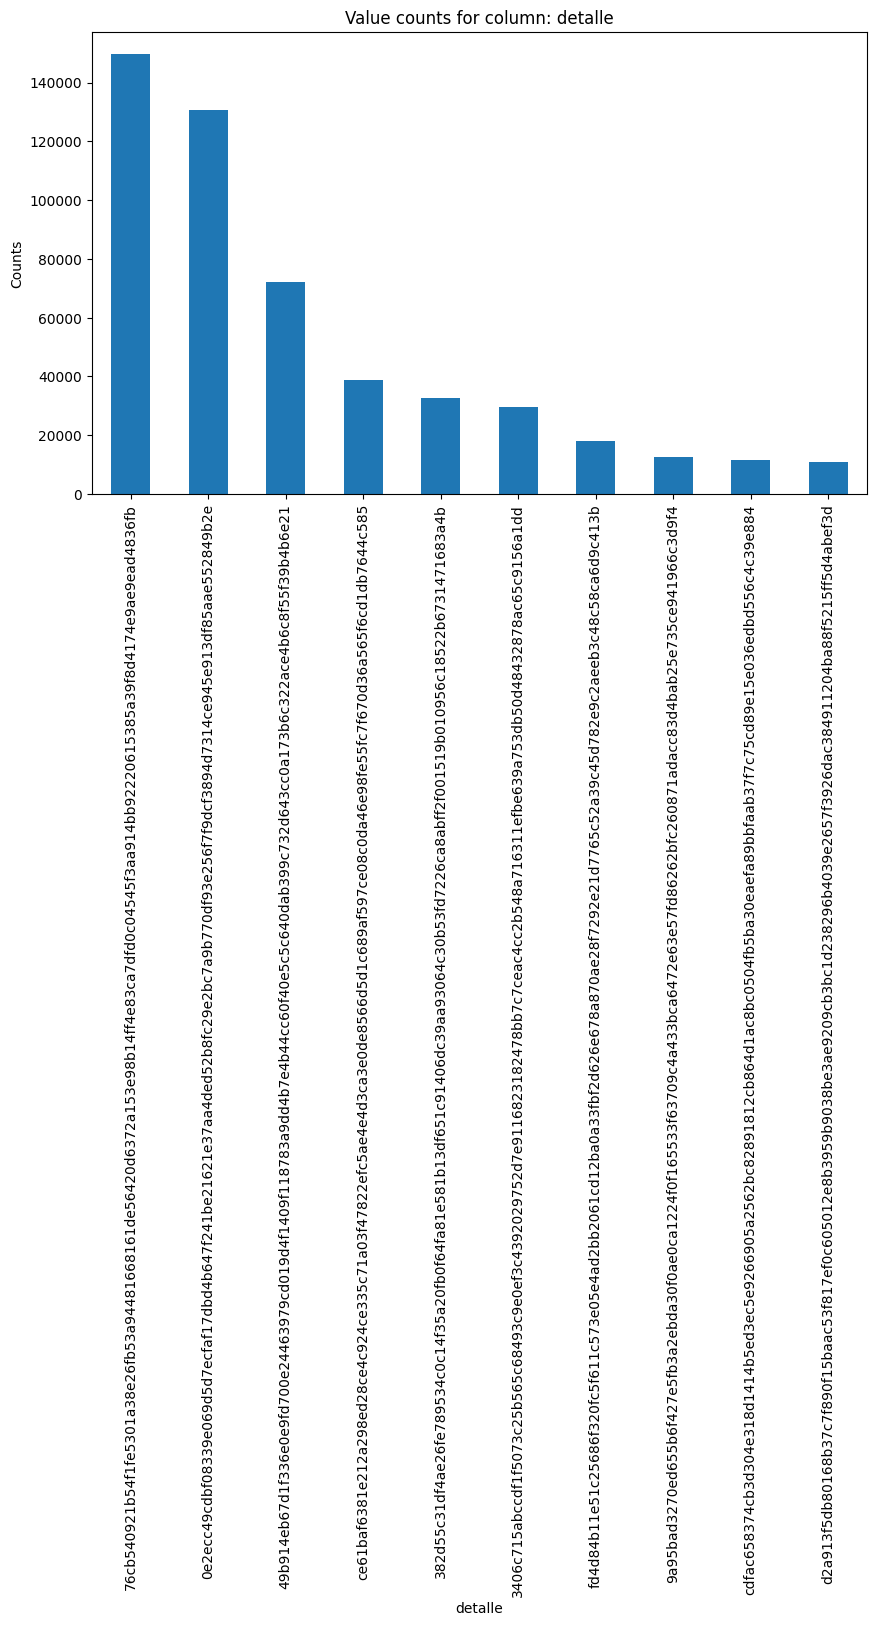

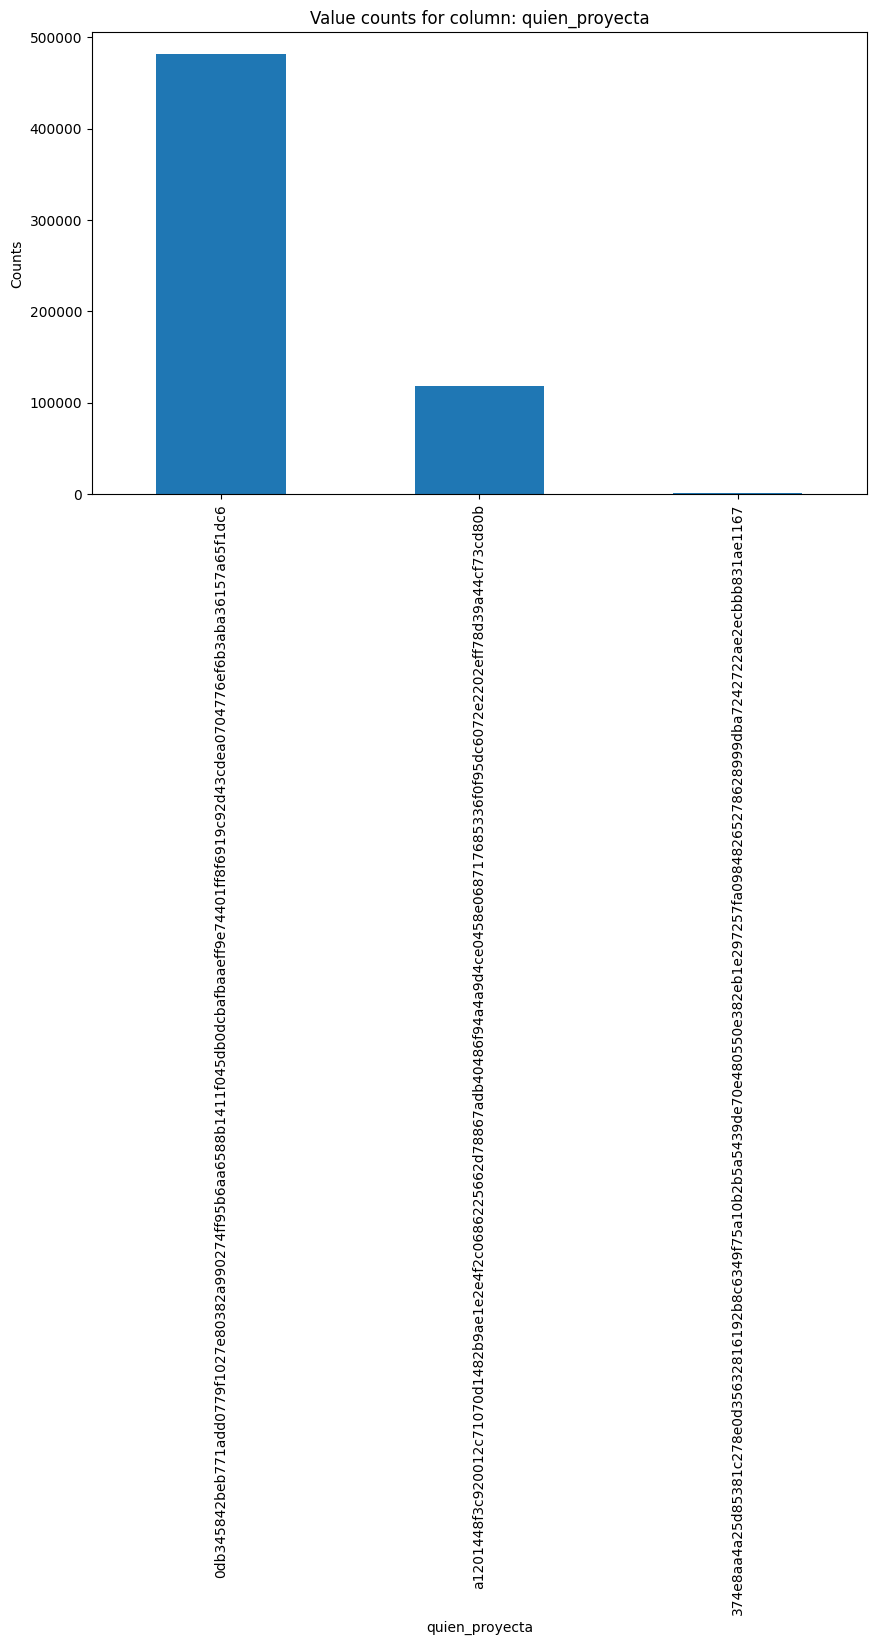

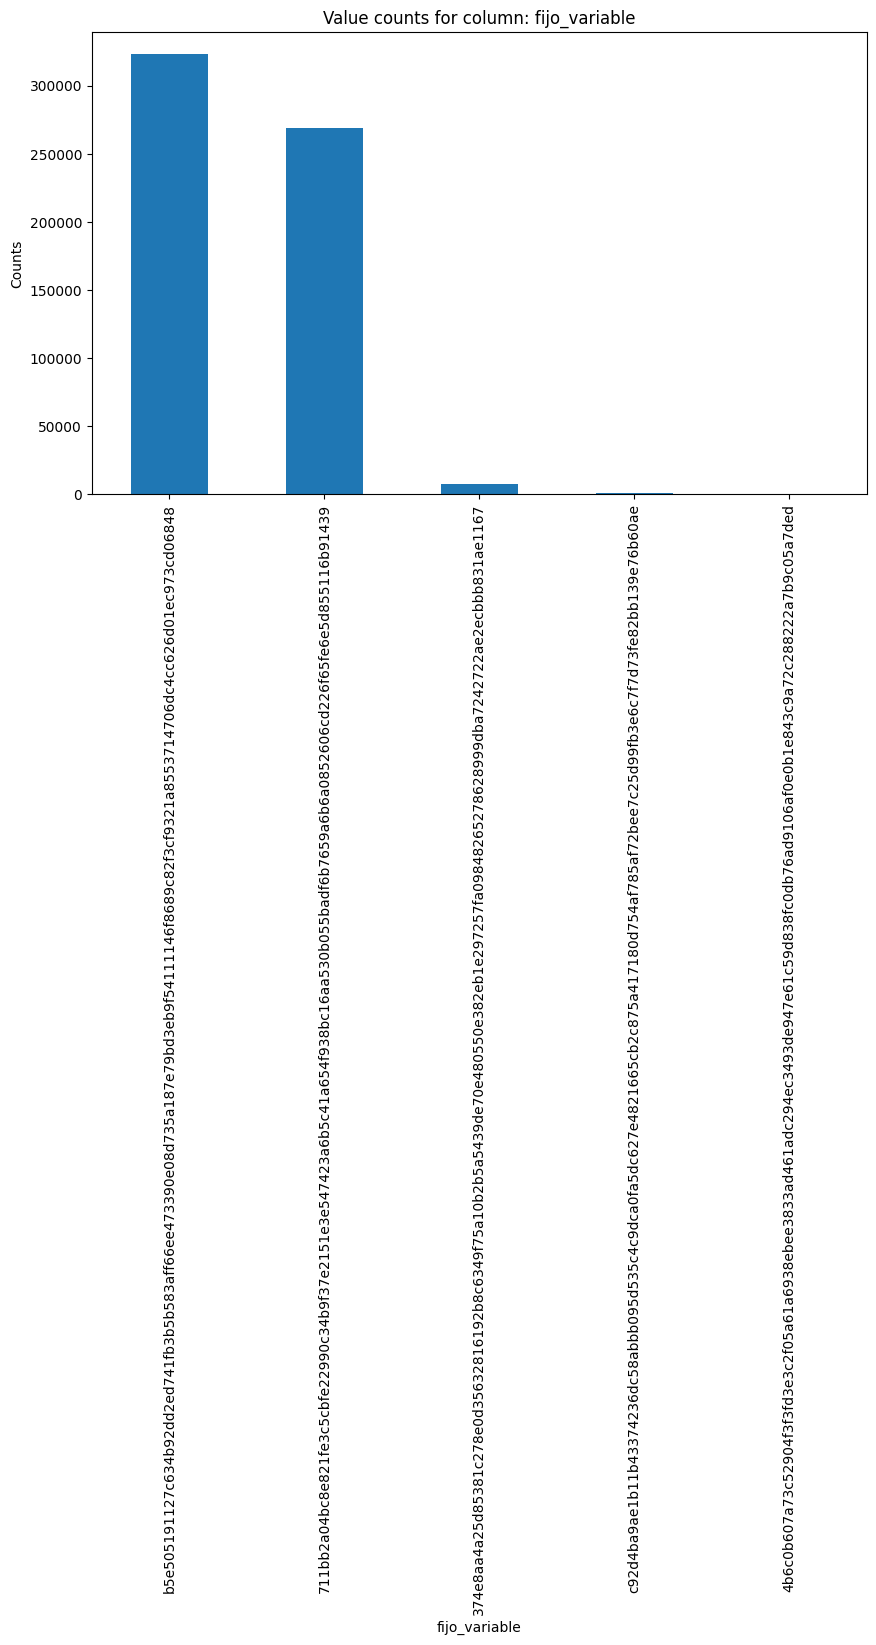

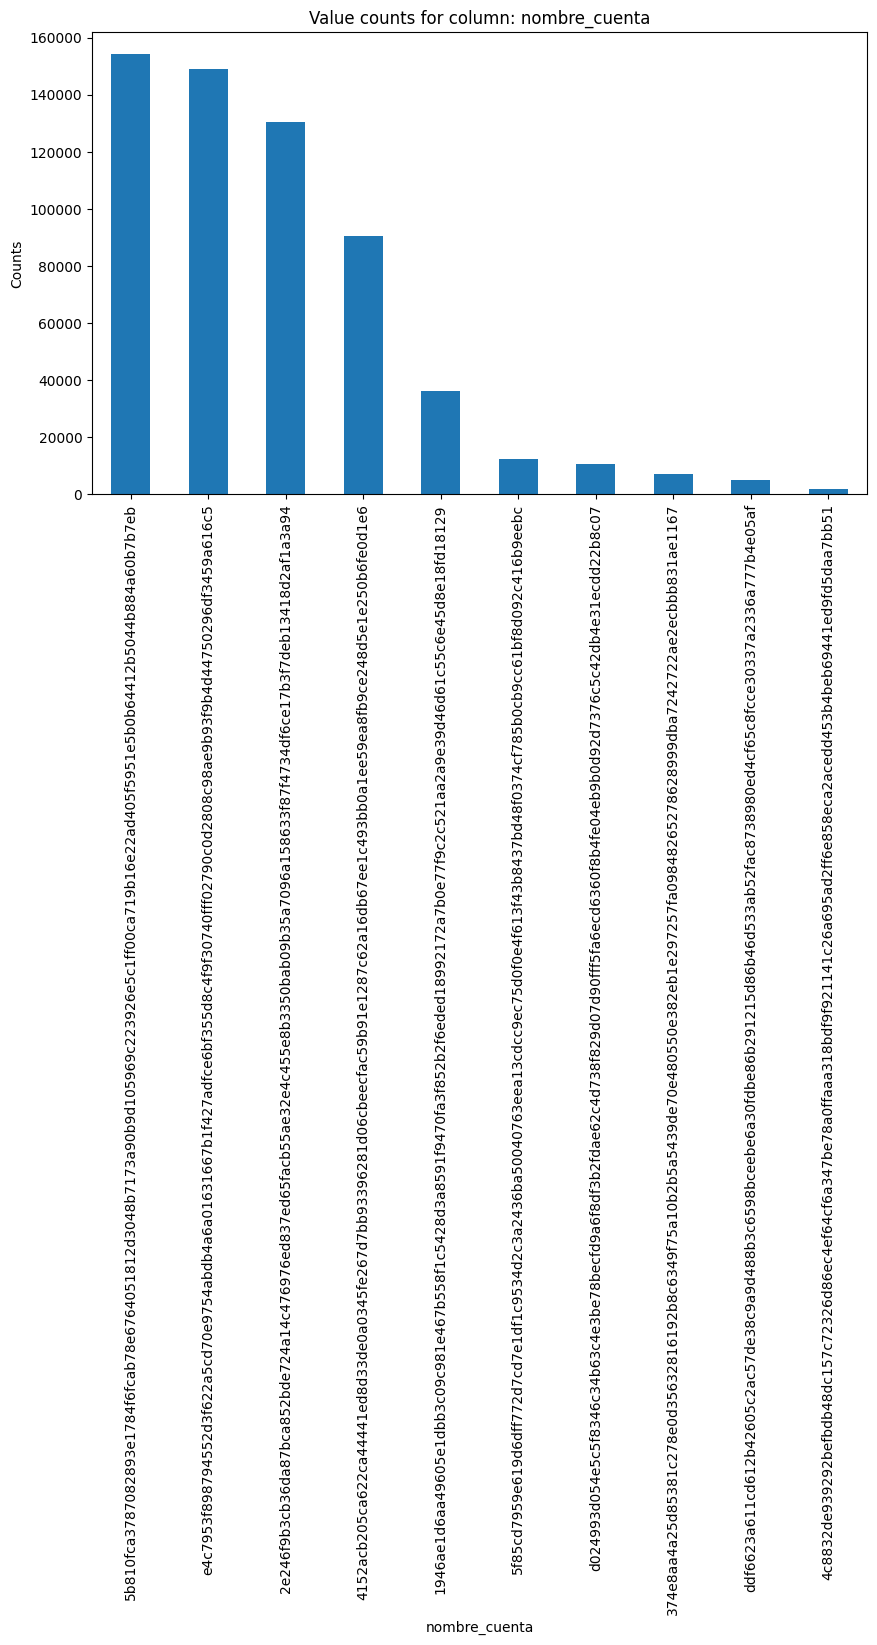

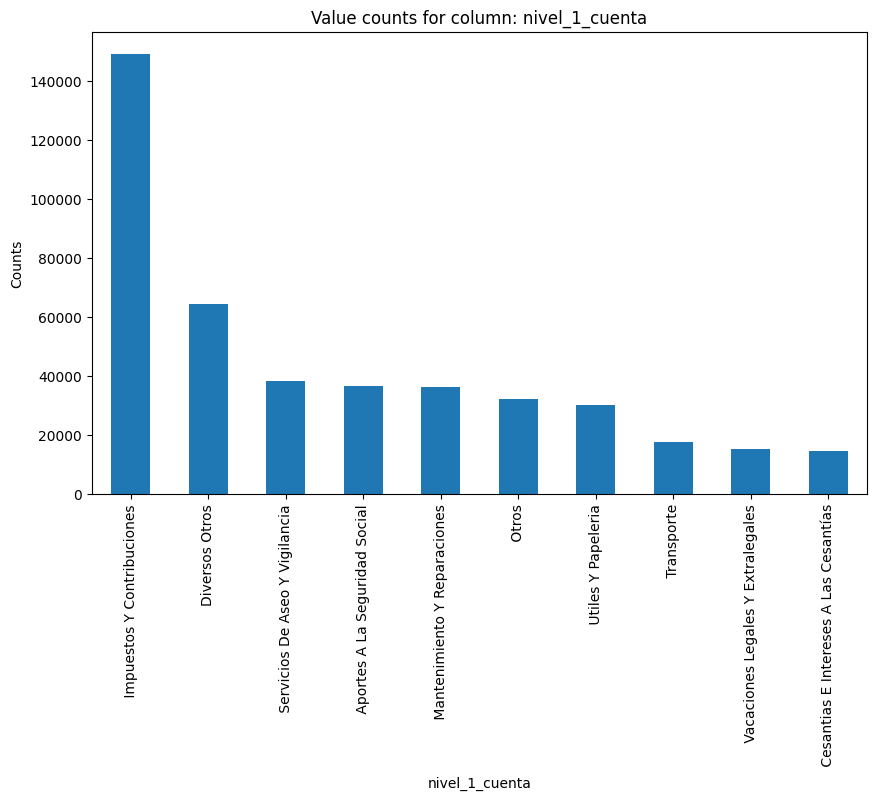

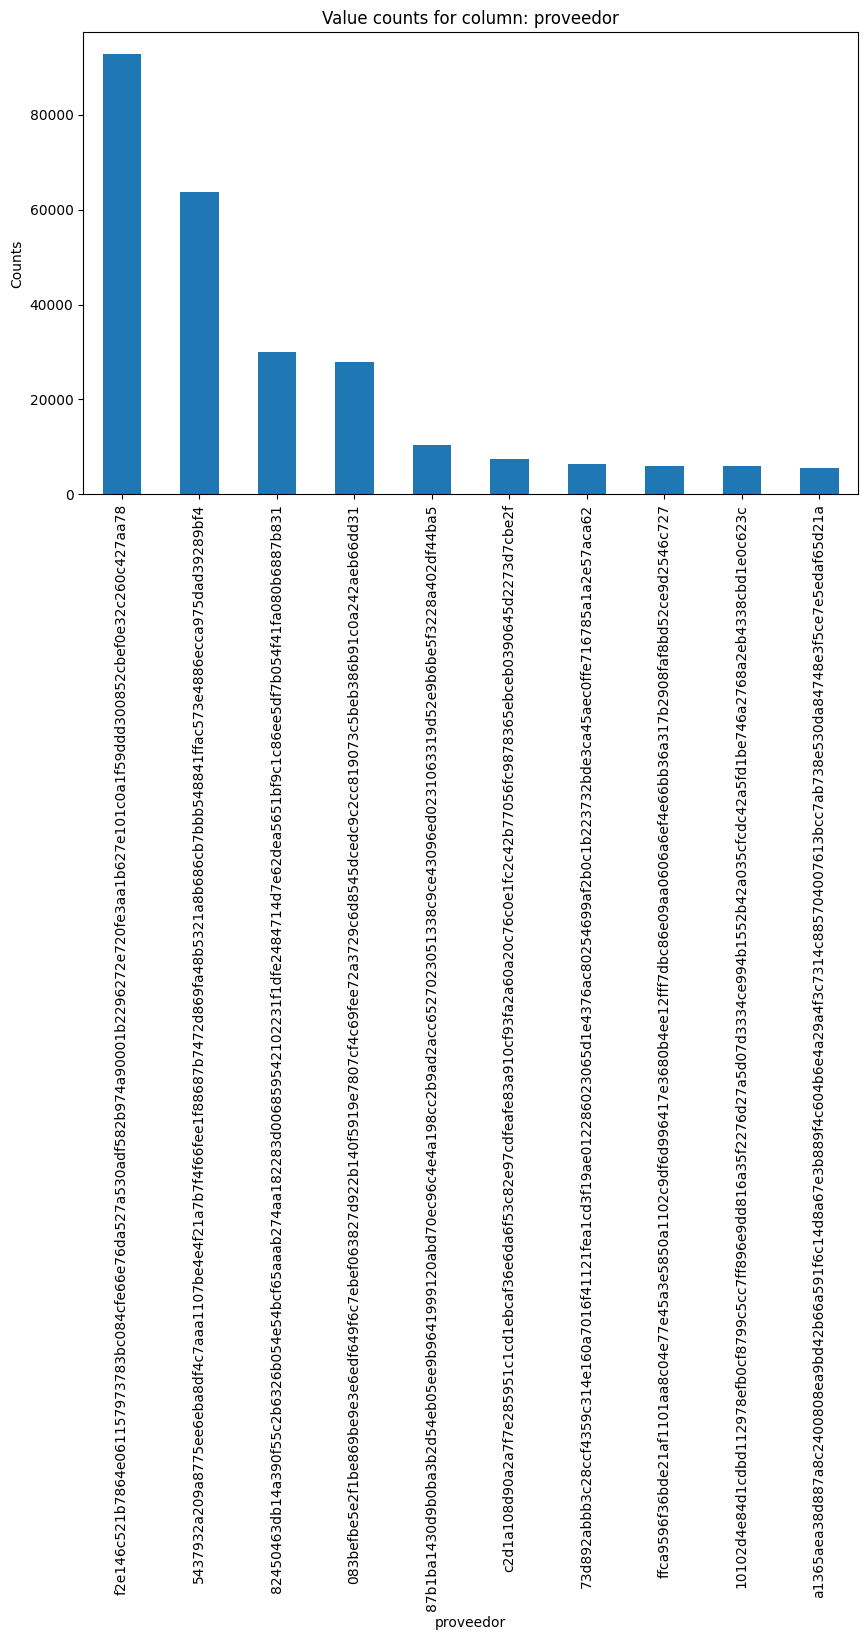

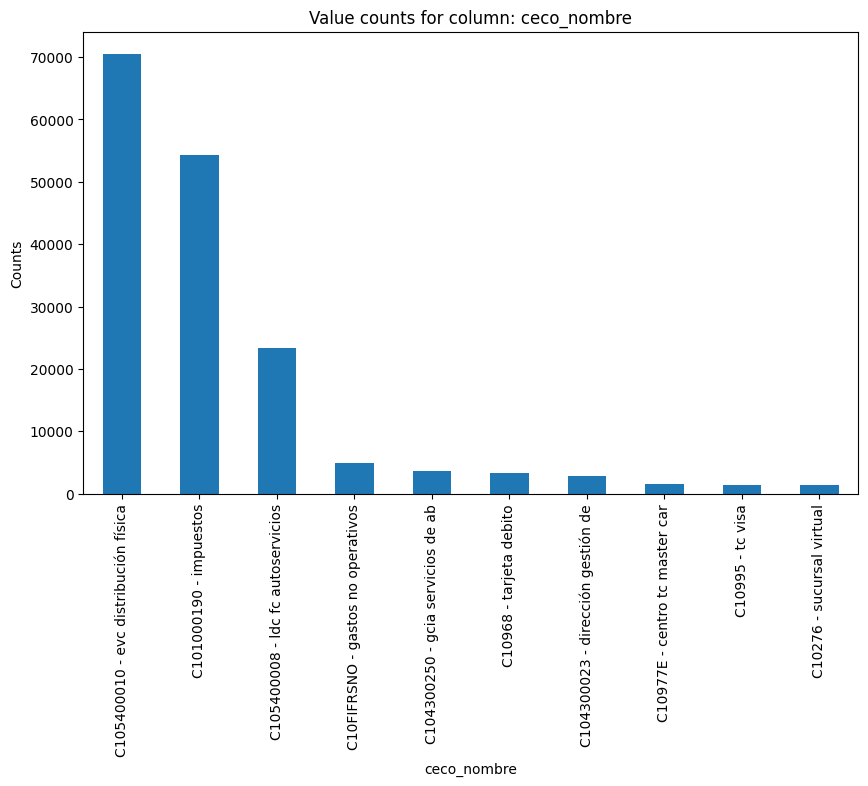

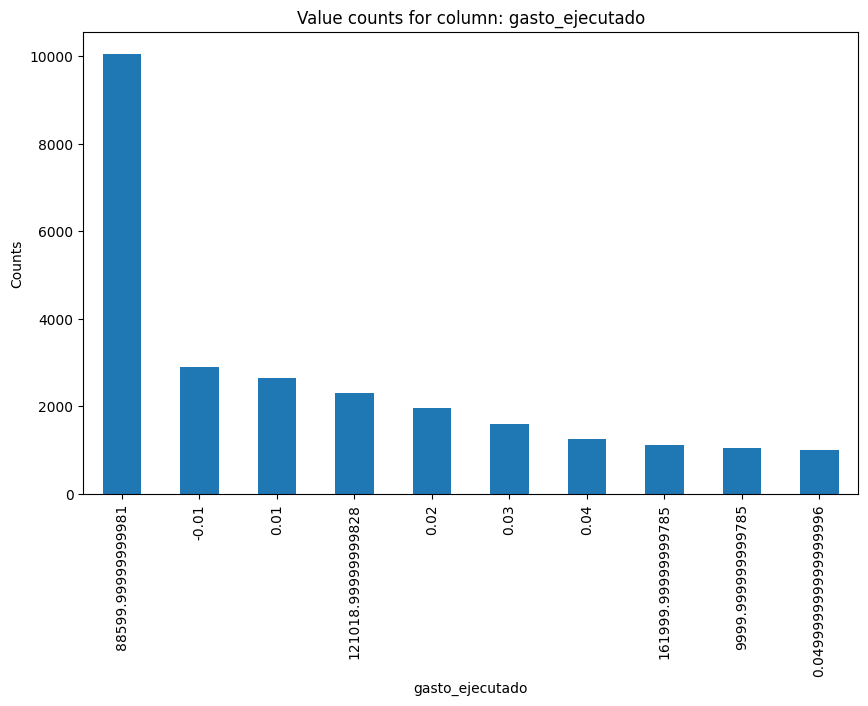

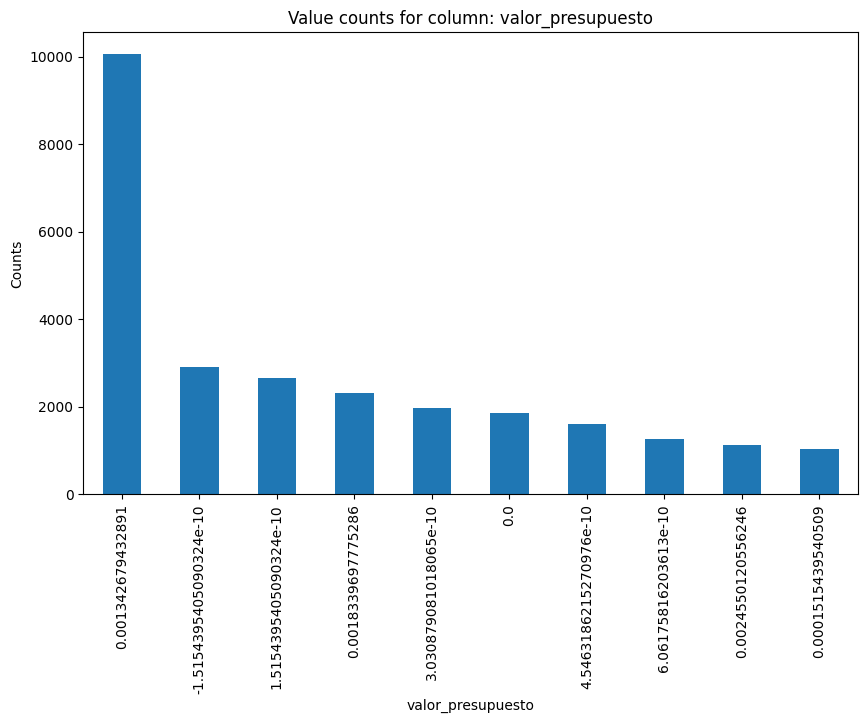

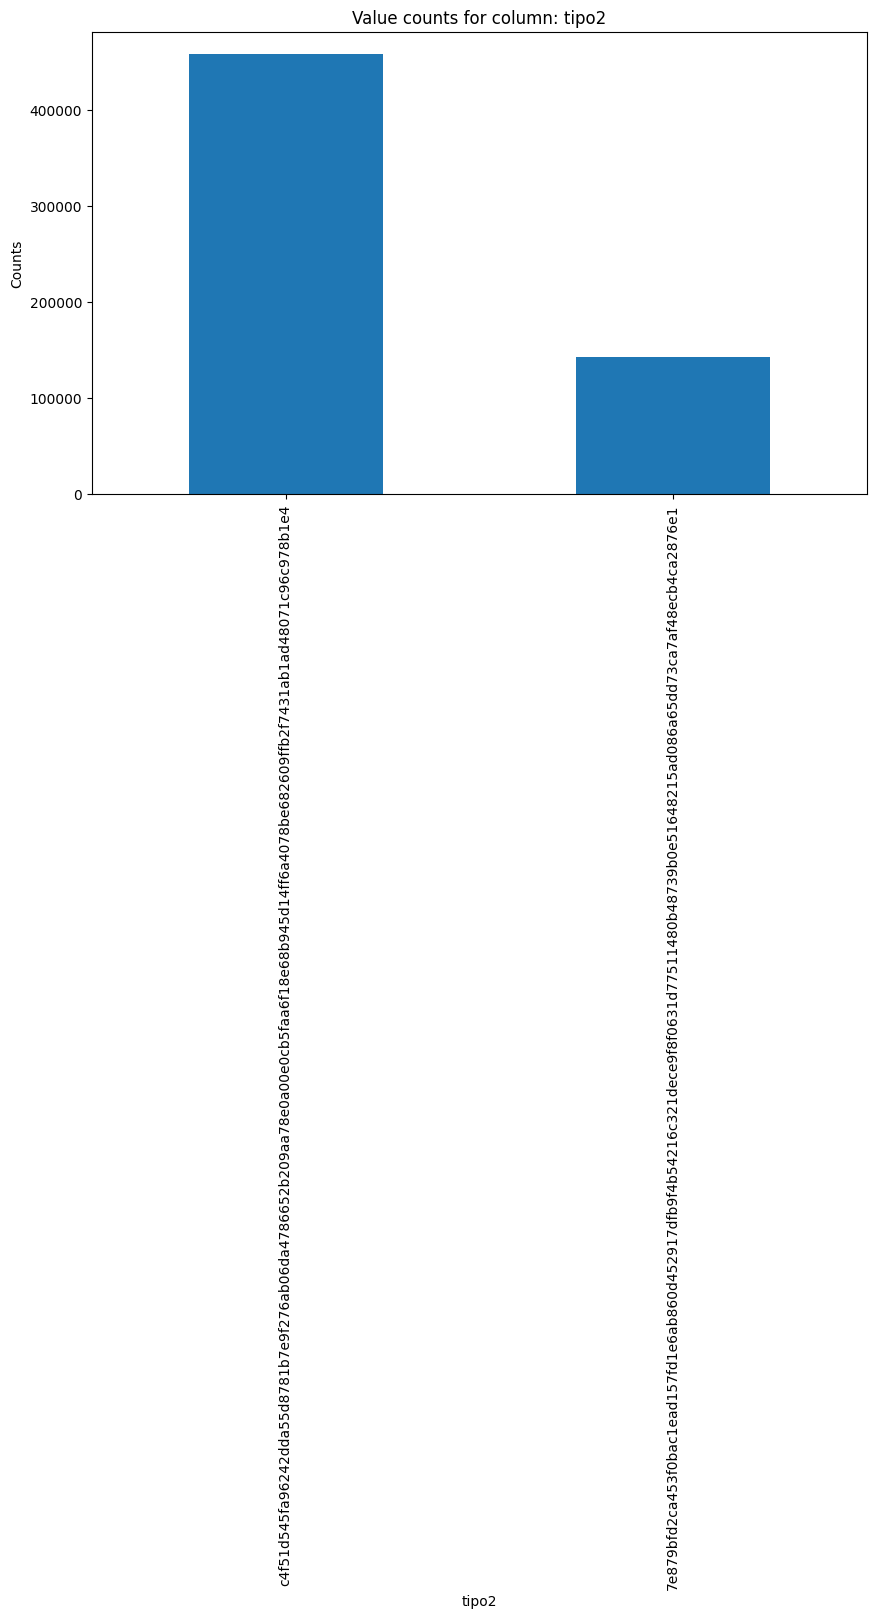

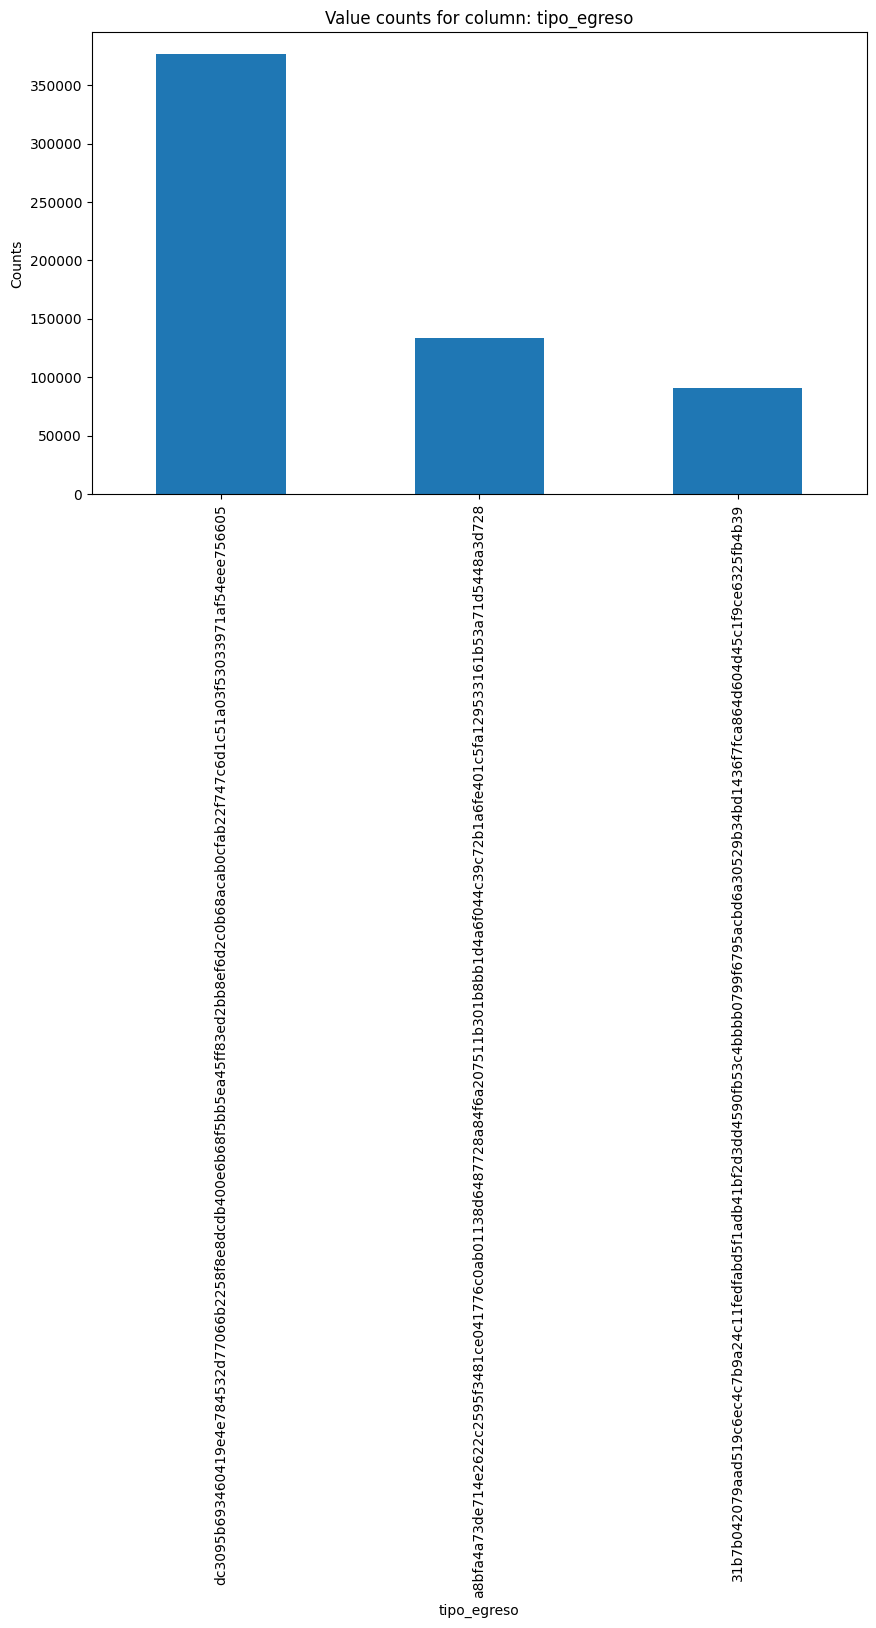

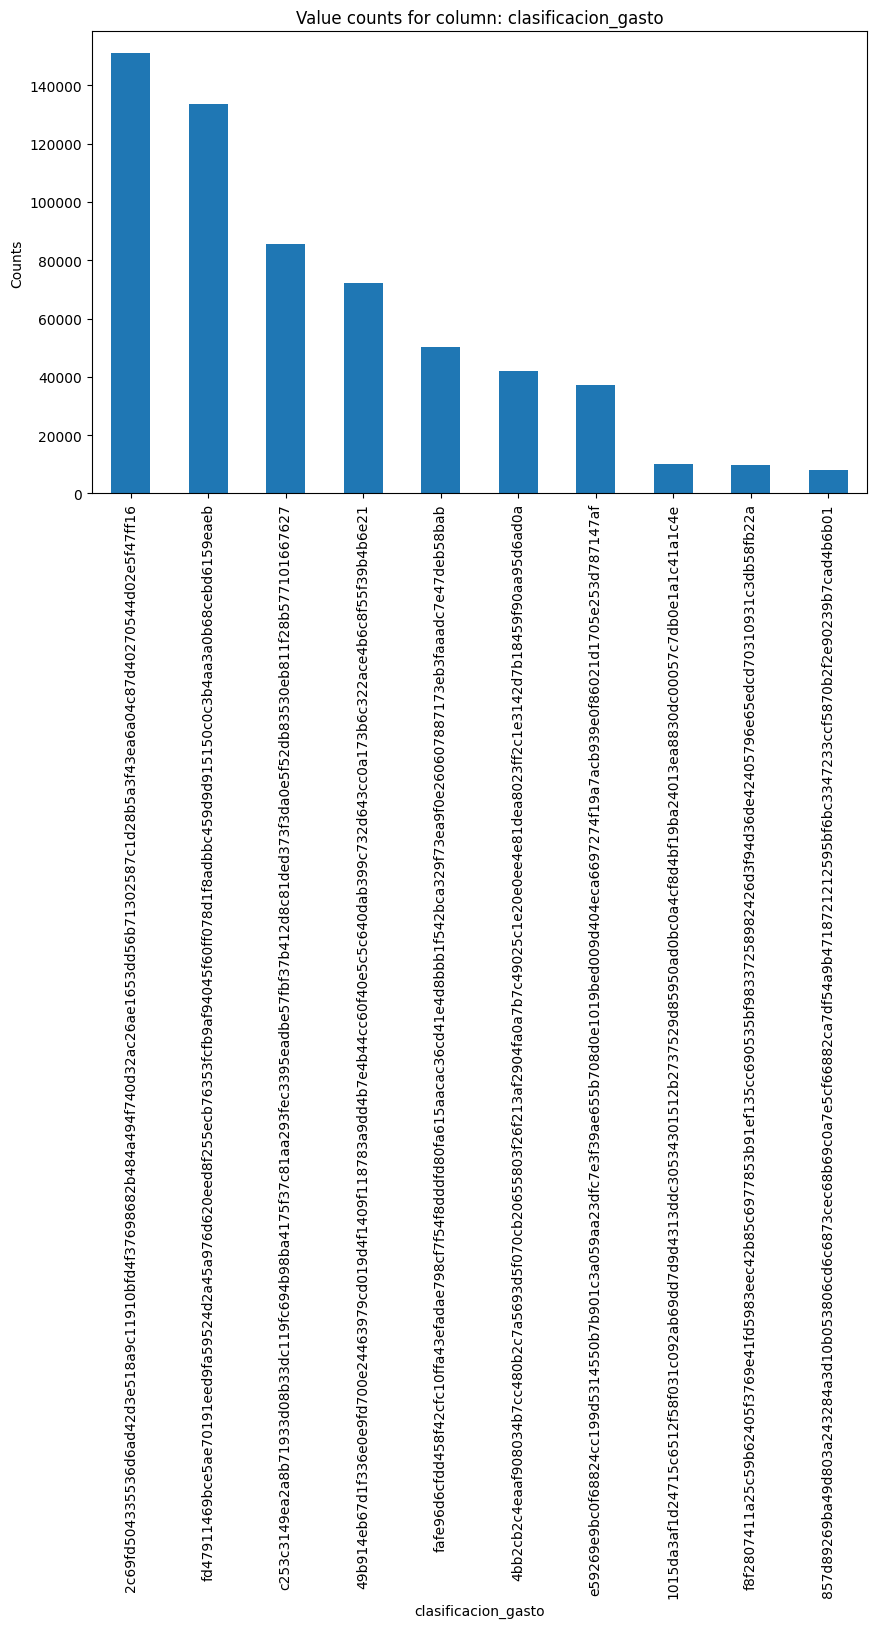

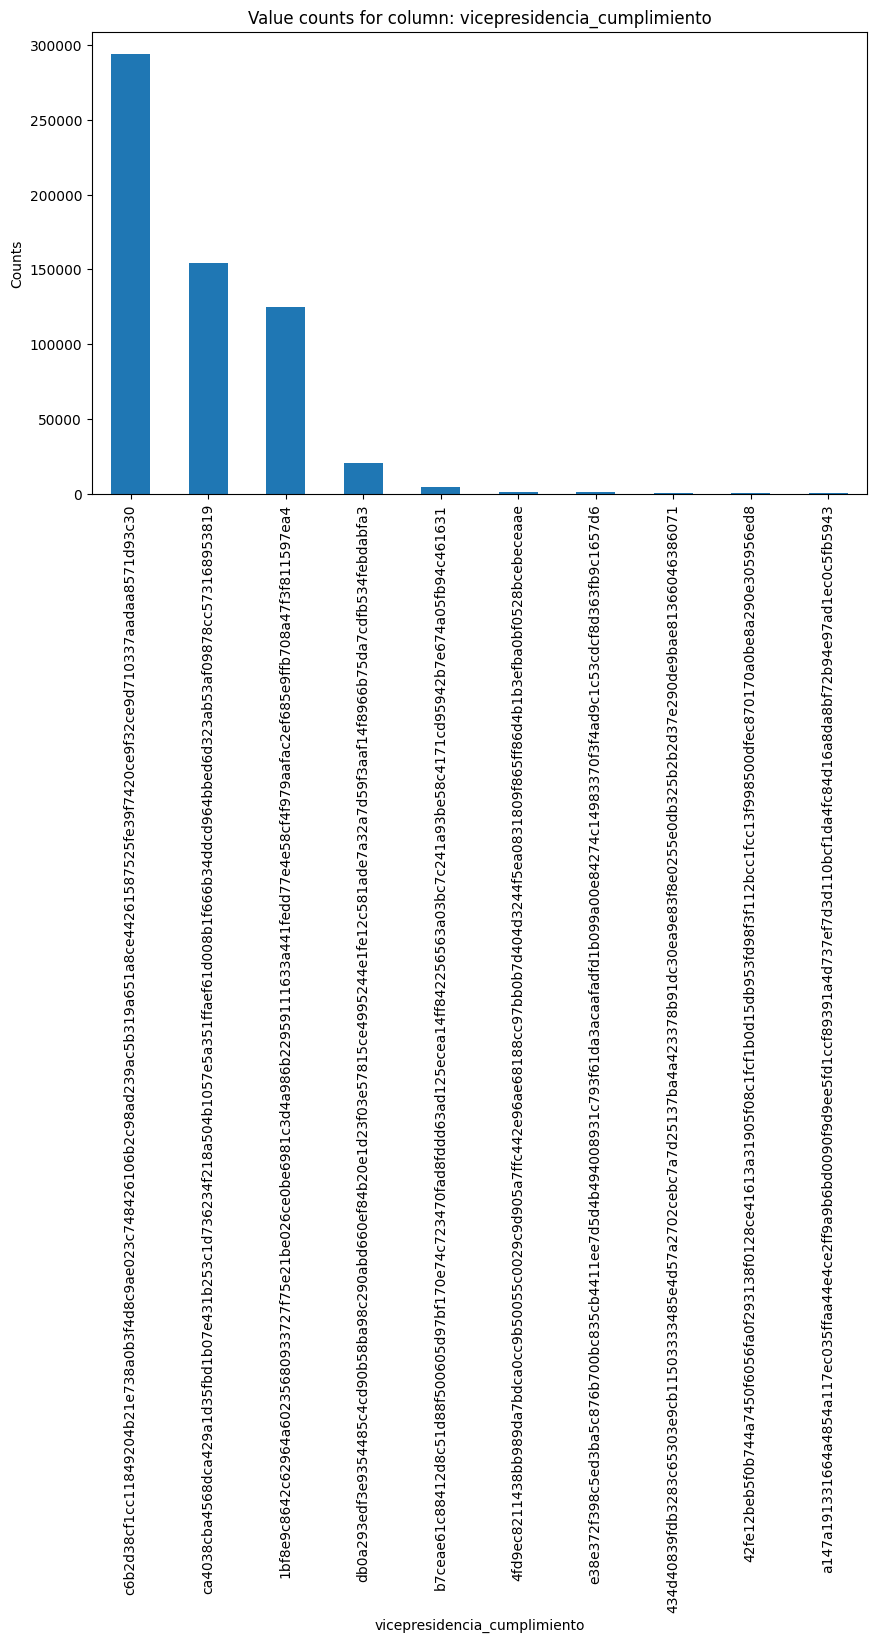

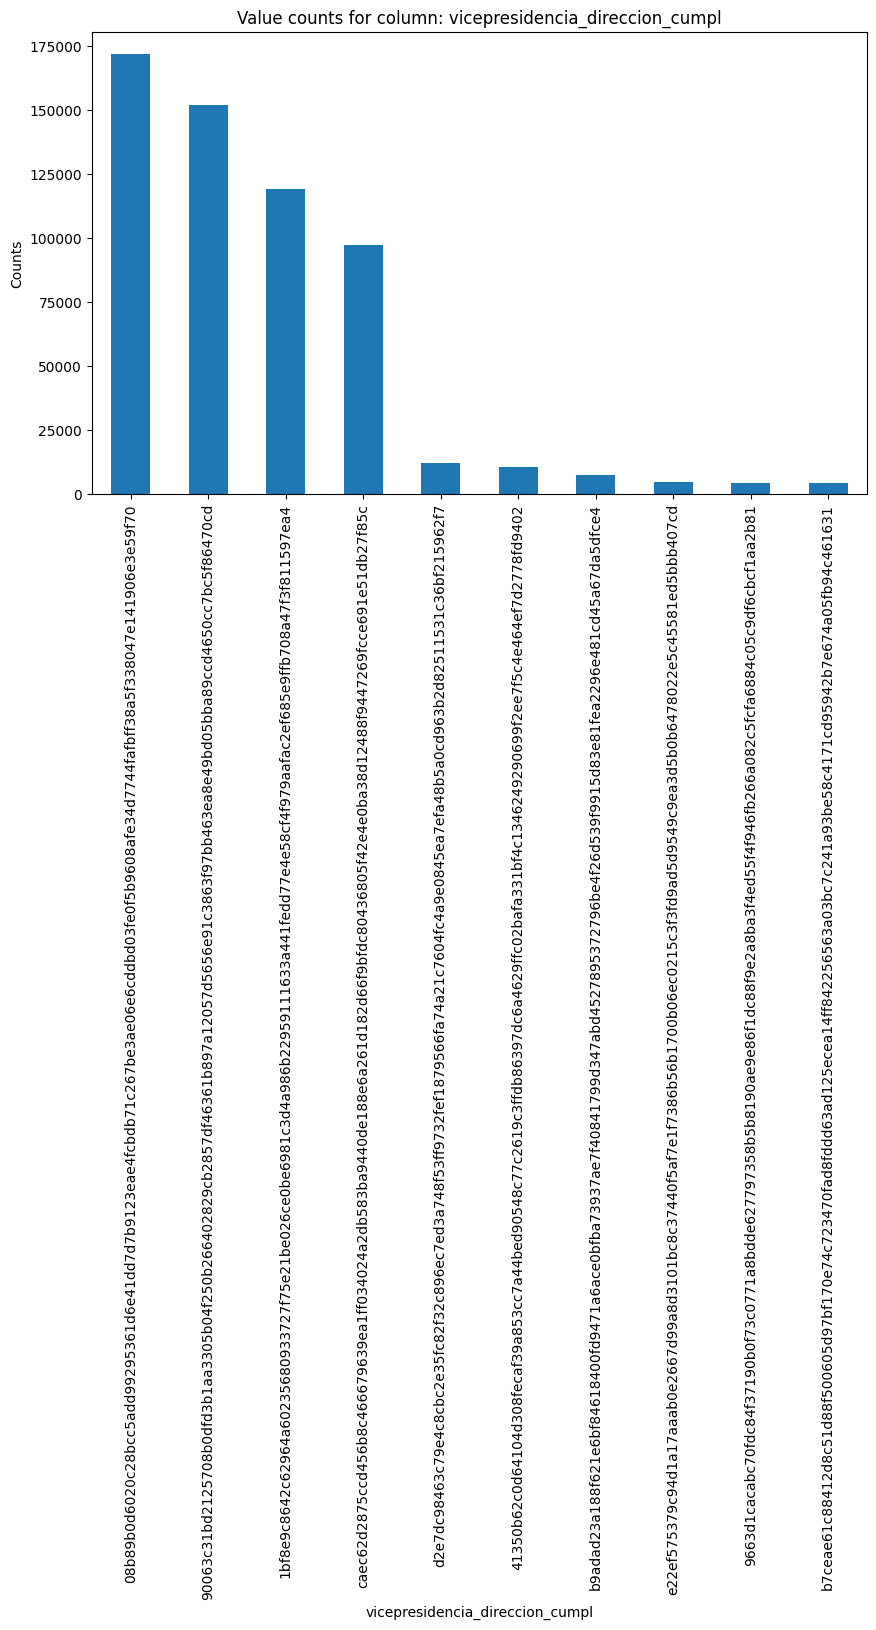

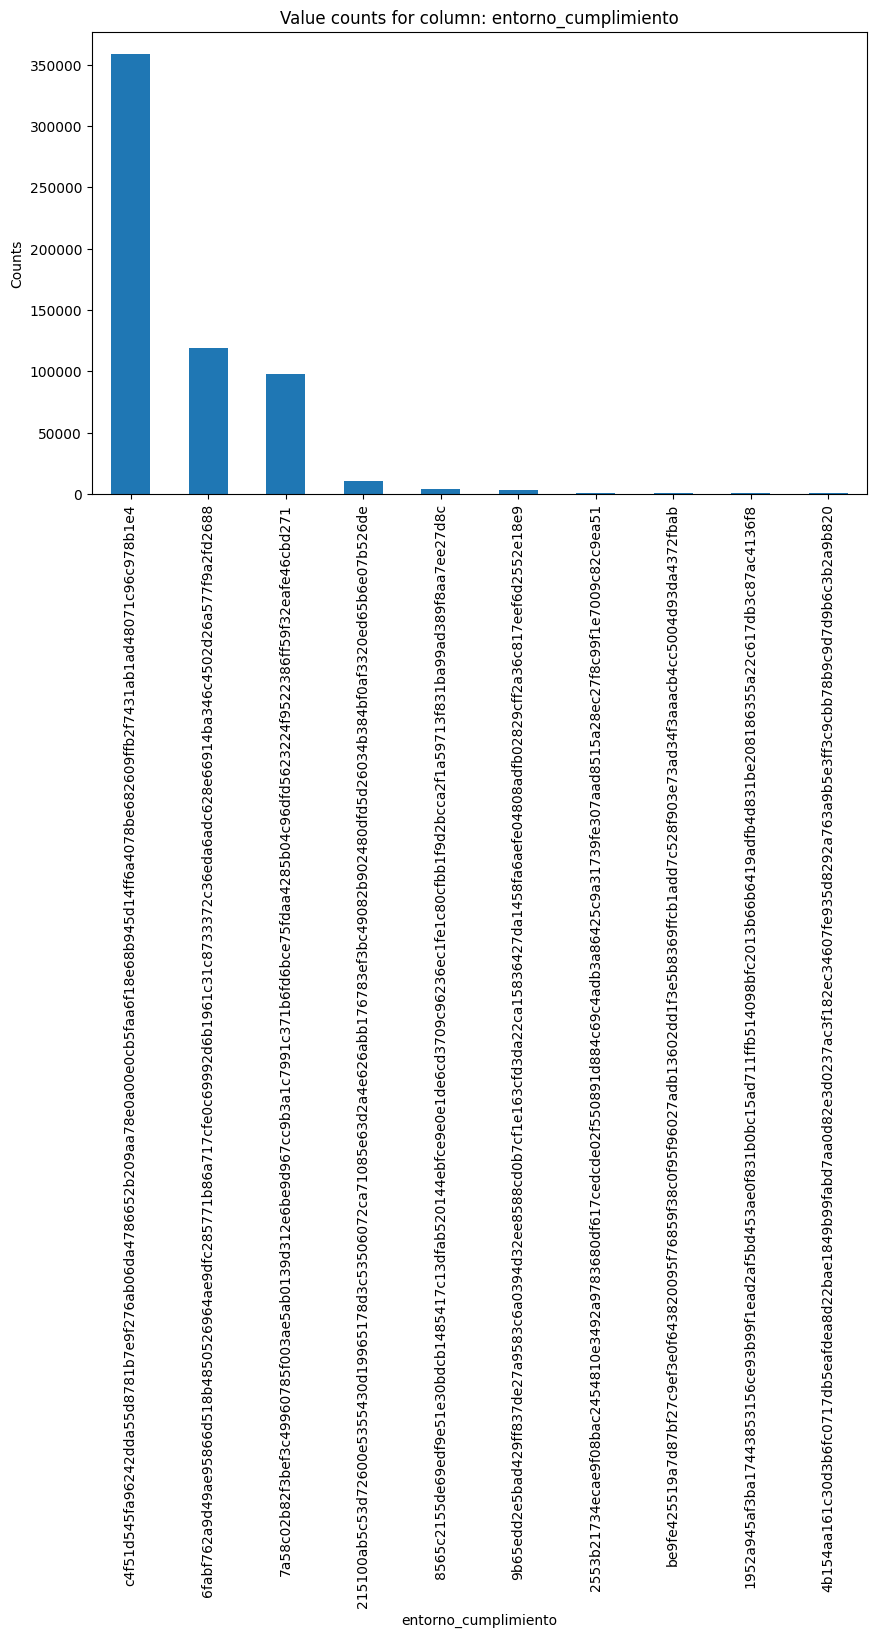

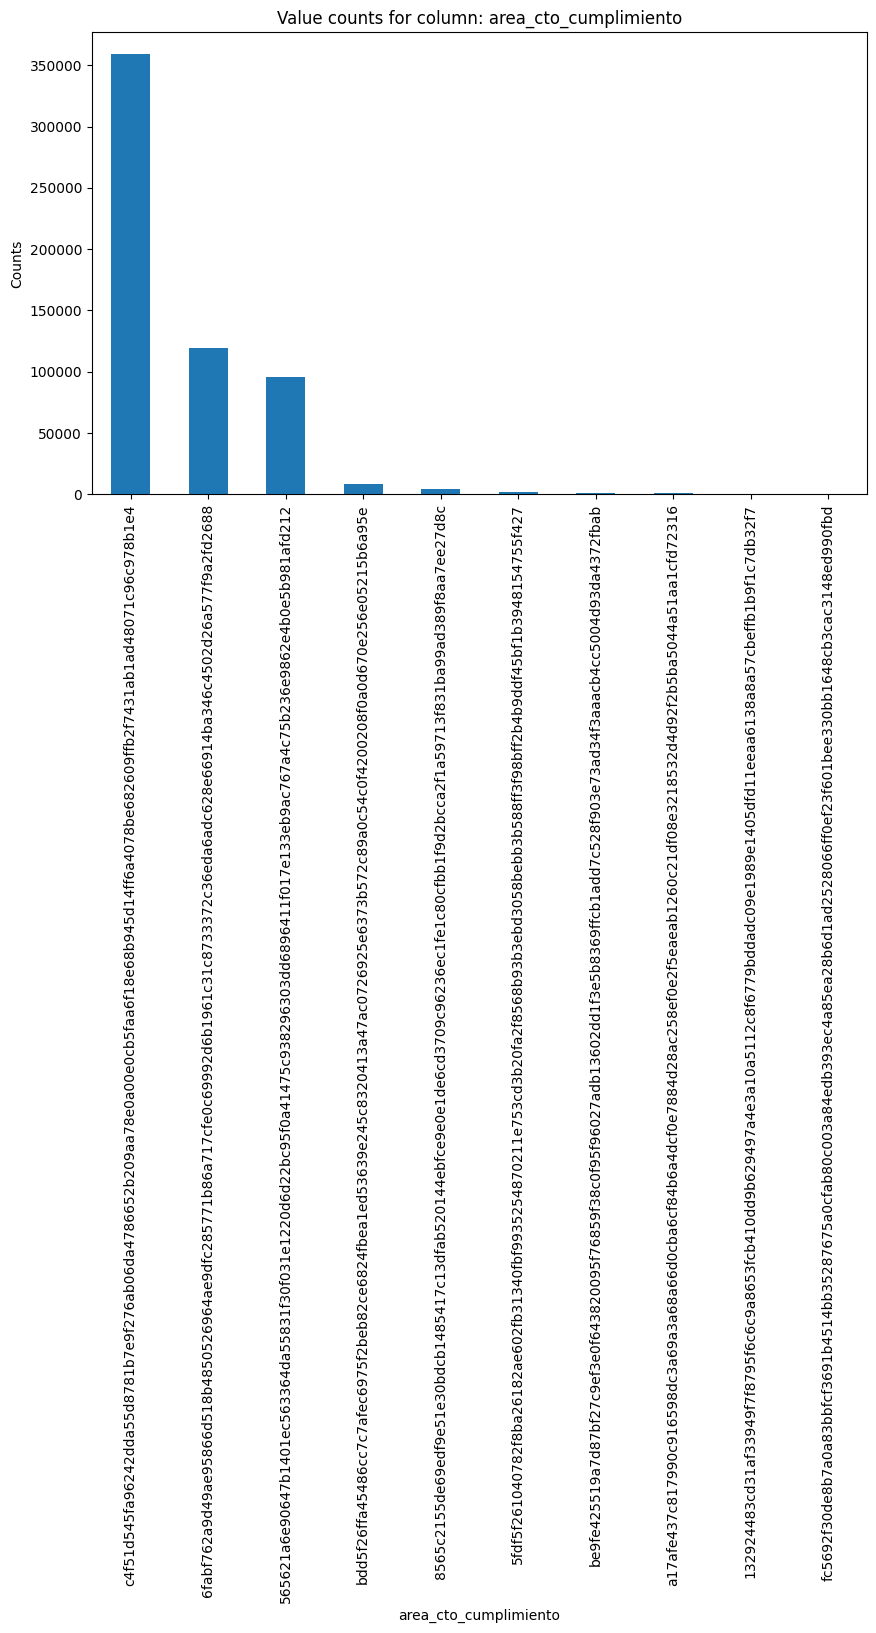

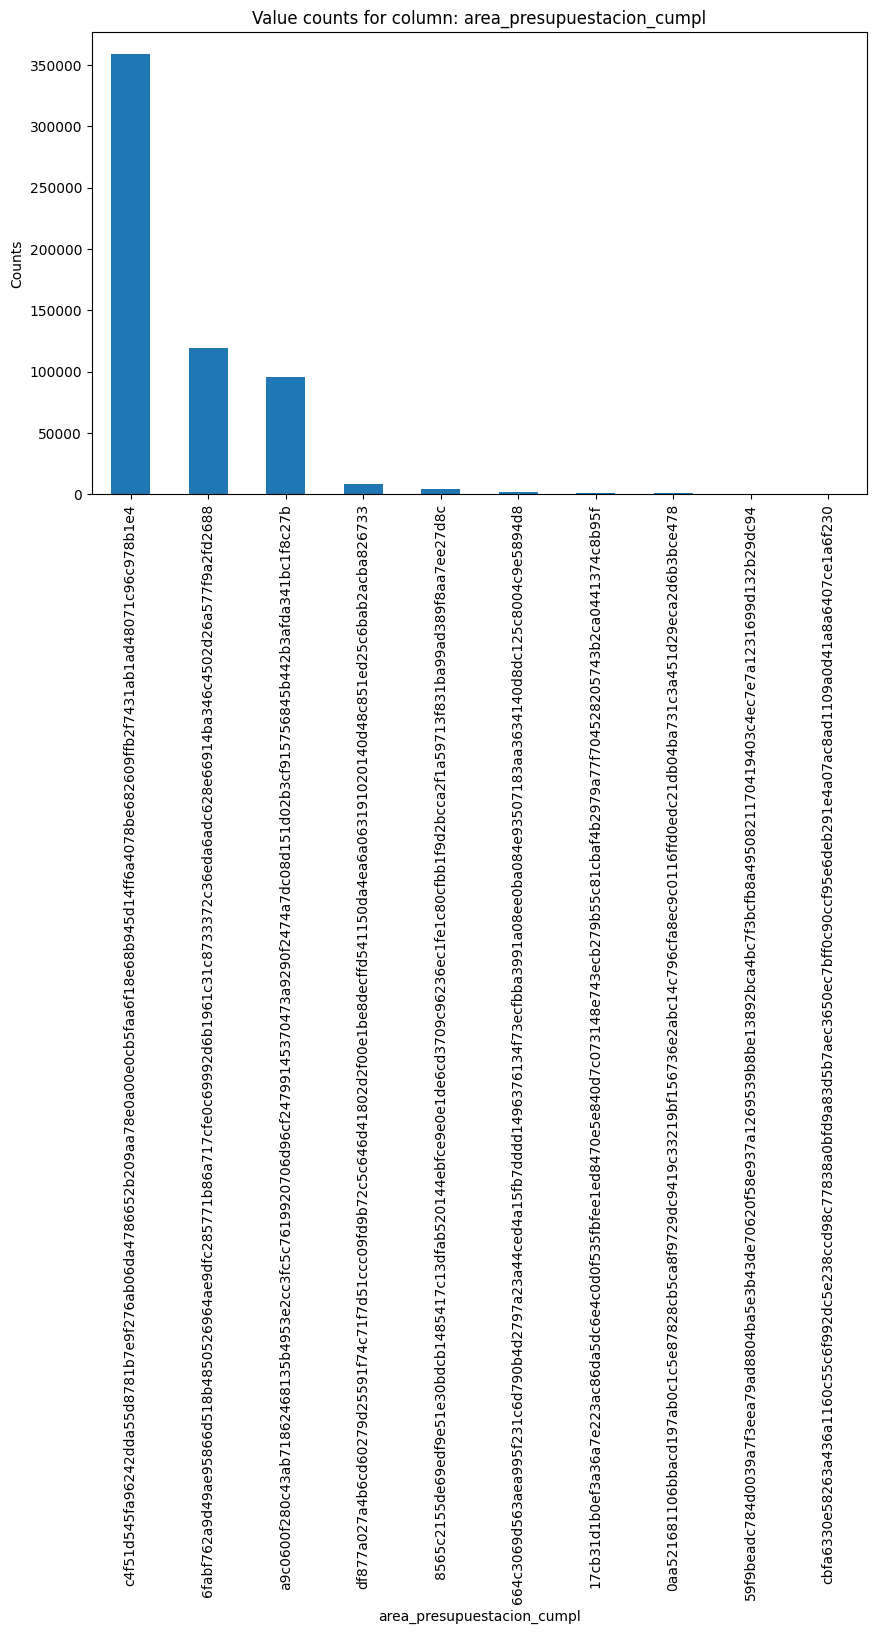

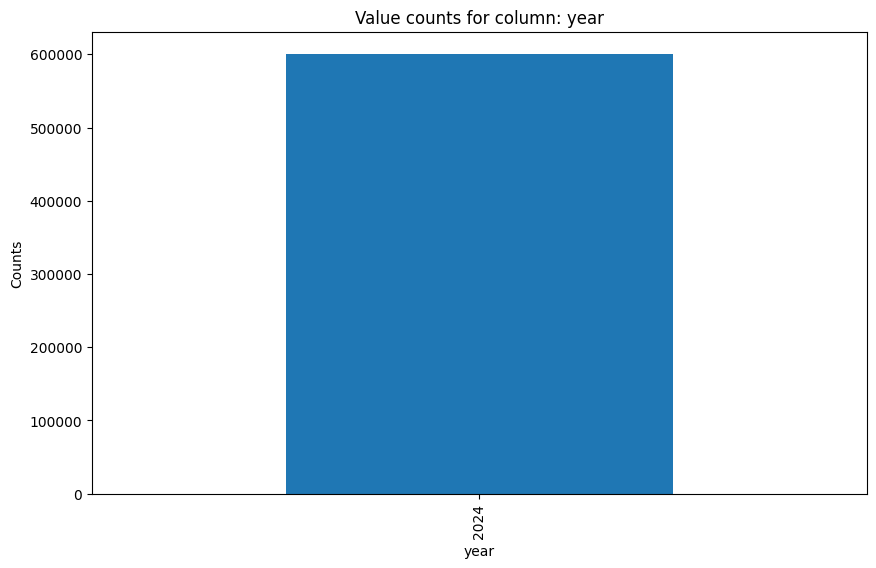

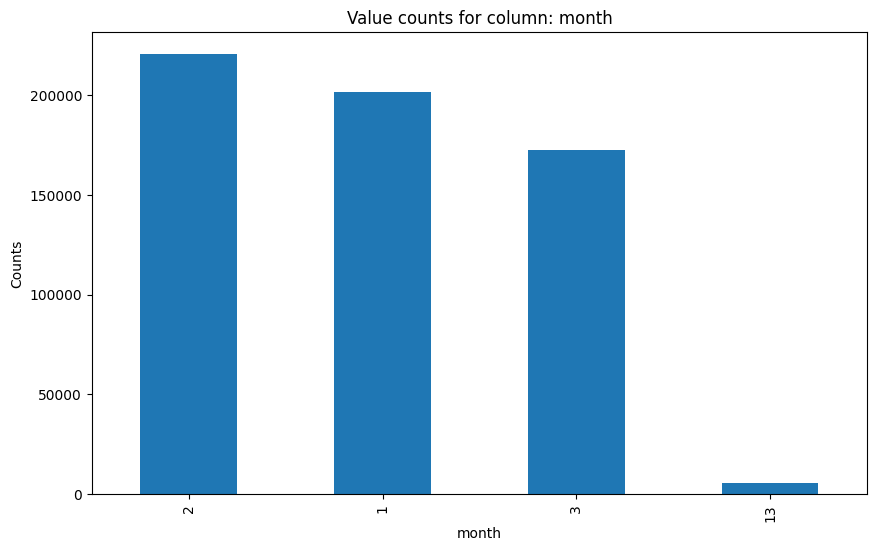

In [36]:
# Iterar sobre cada columna y mostrar value_counts() con gráficos de barras
for column in df.columns:
    value_counts = df[column].value_counts()
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
    
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f"Value counts for column: {column}")
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()